In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

# ANALYSIS DATA FATAL POLICE SHOOTING 2015 - 2020

## INTRODUCTION


### 1,013 people have been shot and killed by police in the past year

In 2015, The Washington Post began to log every fatal shooting by an on-duty police officer in the United States. In that time there have been more than 5,000 such shootings recorded by The Post.

After Michael Brown, an unarmed Black man, was killed in 2014 by police in Ferguson, Mo., a Post investigation found that the FBI undercounted fatal police shootings by more than half. This is because reporting by police departments is voluntary and many departments fail to do so.

The Post’s data relies primarily on news accounts, social media postings and police reports. Analysis of more than five years of data reveals that the number and circumstances of fatal shootings and the overall demographics of the victims have remained relatively constant.

- Black Americans are killed at a much higher rate than White Americans
- Most victims are young, male
- Shootings happen across the country

Ref : https://www.washingtonpost.com/graphics/investigations/police-shootings-database/

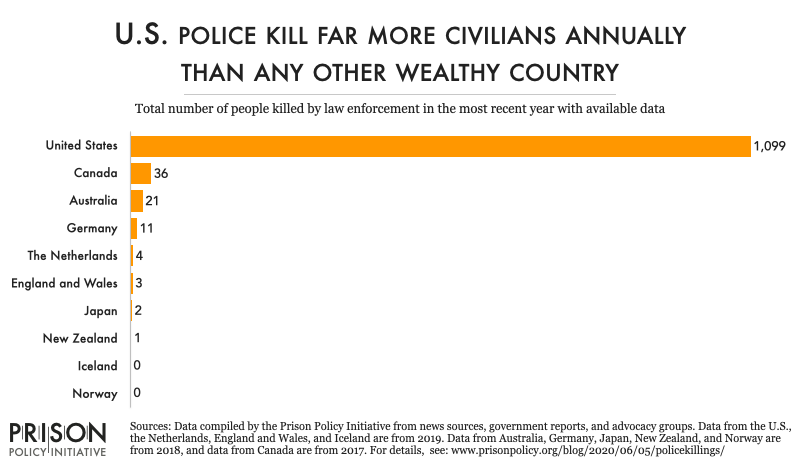

## 1. INPUT DATA FATAL POLICE SHOOTING

Data Source: https://www.kaggle.com/anatpeled/fatal-polich-shooting-notebook-kahana-peled

In [2]:
data = pd.read_csv('fatal-police-shootings-data.csv')
df = data.copy()
df.head()

id                name        date   manner_of_death       armed   age  \
0   3          Tim Elliot  2015-01-02              shot         gun  53.0   
1   4    Lewis Lee Lembke  2015-01-02              shot         gun  47.0   
2   5  John Paul Quintero  2015-01-03  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  2015-01-04              shot  toy weapon  32.0   
4   9   Michael Rodriguez  2015-01-04              shot    nail gun  39.0   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleeing        False  
2  Not fleeing        False  
3  Not fleeing        False  
4  Not fleeing        False

## 2. PREPROCESSING DATA

## 2.1 Information From Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5495 entries, 0 to 5494
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5495 non-null   int64  
 1   name                     5495 non-null   object 
 2   date                     5495 non-null   object 
 3   manner_of_death          5495 non-null   object 
 4   armed                    5283 non-null   object 
 5   age                      5253 non-null   float64
 6   gender                   5494 non-null   object 
 7   race                     4941 non-null   object 
 8   city                     5495 non-null   object 
 9   state                    5495 non-null   object 
 10  signs_of_mental_illness  5495 non-null   bool   
 11  threat_level             5495 non-null   object 
 12  flee                     5237 non-null   object 
 13  body_camera              5495 non-null   bool   
dtypes: bool(2), float64(1), 

In [4]:
# Total ID Unique
df['id'].nunique()

5495

In [5]:
# Total Nama Unique
df['name'].nunique()

5284

In [6]:
# Total row that has the same name
len(df['name']) - df['name'].nunique() 

211

**Column name have 5284 unique from 5495 data, there are 211 rows that have same name.**

**We will check the presence of duplicate data**

In [7]:
# Searching for identical lines
df.duplicated().sum()

0

In [8]:
# Search semi-duplicates
data_duplicate1 = df.loc[df.duplicated(subset=['date', 'gender', 'age', 'armed', 'race', 'state', 'city', 'threat_level', 'flee'], keep=False)]
data_duplicate1
#data[data.index.isin(['3364', '4246'])]

id                    name        date manner_of_death         armed  \
1719  1927  George Richards-Meyers  2016-09-30            shot  undetermined   
1722  1930           Najier Salaam  2016-09-30            shot  undetermined   
4840  5260         Lamar Alexander  2019-12-05            shot           gun   
4841  5261      Ronnie Jerome Hill  2019-12-05            shot           gun   

       age gender race     city state  signs_of_mental_illness  threat_level  \
1719  18.0      M    B   Newark    NJ                    False  undetermined   
1722  18.0      M    B   Newark    NJ                    False  undetermined   
4840  41.0      M    B  Miramar    FL                    False        attack   
4841  41.0      M    B  Miramar    FL                    False        attack   

             flee  body_camera  
1719  Not fleeing        False  
1722  Not fleeing        False  
4840          Car        False  
4841          Car        False

**From search for identical lines and semi-duplicates, we conclude no duplicate data**

In [9]:
df['date'].unique()

array(['2015-01-02', '2015-01-03', '2015-01-04', ..., '2020-07-27',
       '2020-07-28', '2020-07-29'], dtype=object)

**Data Fatal Police Shooting : Jan 2015 - July 2020**

In [10]:
df['manner_of_death'].unique()

array(['shot', 'shot and Tasered'], dtype=object)

Note :

taser = a hand-held, battery-operated device used to deliver a powerful electric shock either by direct contact or by firing electrically charged darts: used for self-defense and law enforcement

In [11]:
df['armed'].unique()
# using or carrying weapons
# How were suspects/victims armed 

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', nan, 'shovel',
       'vehicle', 'hammer', 'hatchet', 'sword', 'machete', 'box cutter',
       'undetermined', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver',
       'carjack', 'chain', "contractor's level", 'unknown weapon',
       'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'baton', 'spear', 'chair', 'pitchfork',
       'hatchet and gun', 'rock', 'piece of wood', 'bayonet', 'pipe',
       'glass shard', 'motorcycle', 'pepper spray', 'metal rake',
       'crowbar', 'oar', 'machete and gun', 'tire iron',
 

Since the data armed was not categorized, we can categorize armed acording to their risk rating. Risk rating related to self-defense police officer from suspect's armed. The category :
- Very Low Threat
- Low Threat
- Medium Threat
- Serious Threat
- High Threat

In [12]:
df['age'].unique()

array([53., 47., 23., 32., 39., 18., 22., 35., 34., 25., 31., 41., 30.,
       37., 28., 42., 36., 49., 71., 33., 29., 43., 24., 75., 68., 27.,
       48., 21., 67., 19., 54., 17., 56., 61., 45., 26., 40., 59., 38.,
       51., 74., 57., 46., 16., 50., 20., 77., nan, 58., 64., 52., 63.,
       44., 60., 66., 83., 72., 76., 62., 55., 69., 86., 15., 65.,  6.,
       12., 70., 80., 14., 82., 13., 73., 91., 79., 78., 84., 81., 89.])

In [13]:
pd.DataFrame(df['age'].describe()).T

count       mean        std  min   25%   50%   75%   max
age  5253.0  37.121645  13.122941  6.0  27.0  35.0  46.0  91.0

In [14]:
df['race'].unique()
# Asian, White; Black or African American; Hispanic; 
# Other Distribution; Native American;

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

Race and ethnicity in the United States Census and Demographics of the United States

- Non-Hispanic/ white	
- Hispanic and Latino (of any race)	-> ethnic origins in a Spanish-speaking country or Brazil
- Black or African American	
- Other Distribution : Asian, Native Americans and Alaska Natives, Native Hawaiians and Other Pacific Islanders, Two or more races (multiracial)

Ref : https://en.wikipedia.org/wiki/Race_and_ethnicity_in_the_United_States#:~:text=As%20of%20July%202016%2C%20White,estimated%2013.4%25%20of%20the%20population.

In [15]:
df['city'].nunique()

2498

In [16]:
df['state'].unique()

array(['WA', 'OR', 'KS', 'CA', 'CO', 'OK', 'AZ', 'IA', 'PA', 'TX', 'OH',
       'LA', 'MT', 'UT', 'AR', 'IL', 'NV', 'NM', 'MN', 'MO', 'VA', 'NJ',
       'IN', 'KY', 'MA', 'NH', 'FL', 'ID', 'MD', 'NE', 'MI', 'GA', 'TN',
       'NC', 'AK', 'NY', 'ME', 'AL', 'MS', 'WI', 'SC', 'DE', 'DC', 'WV',
       'HI', 'WY', 'ND', 'CT', 'SD', 'VT', 'RI'], dtype=object)

In [17]:
df['state'].nunique()

51

In [18]:
df['signs_of_mental_illness'].unique()
# having mental ilness or not for killed people

array([ True, False])

In [19]:
df['threat_level'].unique()
#Perceived level of threat

array(['attack', 'other', 'undetermined'], dtype=object)

In [20]:
df['flee'].unique()
# run away from a place or situation of danger.
# Were they trying to flee

array(['Not fleeing', 'Car', 'Foot', 'Other', nan], dtype=object)

In [21]:
df['body_camera'].unique()
# Having body cameras or not for police

array([False,  True])

## 2.2 Summary Information Data
Type Feature :
- Numerical Data : Age
- Categorical Data : date, manner_of death, armed, gender, race, city, state, sign_of mental ilness, threat level, flee, body_camera

Data armed not categorized, we can categorized armed based risk rating that related self-defence police officer

No duplicated data

##  2.3 Handling Missing Data

Total missing data  Percentage
race                 554.0   10.081893
flee                 258.0    4.695177
age                  242.0    4.404004
armed                212.0    3.858053
gender                 1.0    0.018198

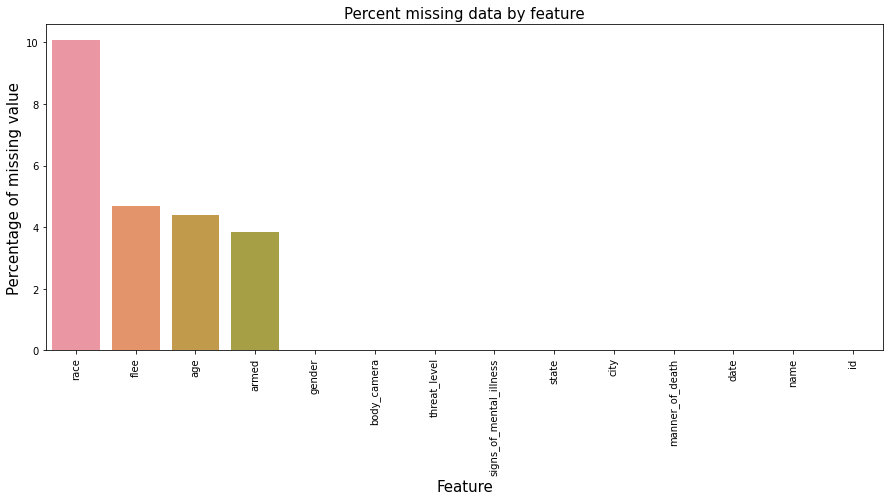

In [22]:
# Total missing data
total = df.isnull().sum().sort_values(ascending=False)

# Percentage missing data
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

# Tabel Missing Data
missing_data = pd.concat([total, percent],axis=1, keys=['Total missing data', 'Percentage'])
tabel_md = missing_data[missing_data > 0].dropna()

# Graph Missing Data
fig, ax = plt.subplots(figsize=(15,6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percentage'])
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Percentage of missing value', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

tabel_md

#### 2.3.1 Race

In [23]:
ms_race= df[df['race'].isnull()]
ms_race

id                       name        date   manner_of_death  \
59     110           William Campbell  2015-01-25              shot   
240    244         John Marcell Allen  2015-03-30              shot   
270    534                 Mark Smith  2015-04-09  shot and Tasered   
340    433                 Joseph Roy  2015-05-07              shot   
398    503       James Anthony Morris  2015-05-31              shot   
...    ...                        ...         ...               ...   
5486  6015                      TK TK  2020-07-24              shot   
5487  6016                      TK TK  2020-07-24              shot   
5490  6006  Samuel Solomon Cochran Jr  2020-07-26              shot   
5492  6007                      TK TK  2020-07-28              shot   
5494  6011                      TK TK  2020-07-29              shot   

           armed   age gender race           city state  \
59           gun  59.0      M  NaN        Winslow    NJ   
240          gun  54.0      M  NaN   Boulder City    NV   
270          NaN  54.0      M  NaN     Kellyville    OK   
340        knife  72.0      M  NaN  Lawrenceville    GA   
398          gun  40.0      M  NaN        Medford    OR   
...          ...   ...    ...  ...            ...   ...   
5486  toy weapon   NaN      M  NaN       Stockton    CA   
5487     vehicle   NaN      M  NaN   West Kendall    FL   
5490       knife  22.0      M  NaN       Mt. Airy    NC   
5492         gun   NaN      M  NaN         Canton    NC   
5494     machete   NaN      M  NaN      Las Vegas    NV   

      signs_of_mental_illness threat_level         flee  body_camera  
59                      False       attack  Not fleeing        False  
240                     False       attack  Not fleeing        False  
270                     False       attack        Other        False  
340                      True        other  Not fleeing        False  
398                      True       attack  Not fleeing        False  
...                       ...          ...          ...          ...  
5486                    False       attack  Not fleeing        False  
5487                    False        other          Car        False  
5490                    False       attack  Not fleeing        False  
5492                    False       attack  Not fleeing        False  
5494                    False       attack  Not fleeing        False  

[554 rows x 14 columns]

In [24]:
## Datetime attributes
ms_race['date'] = pd.to_datetime(ms_race['date'])

# Add year to data
ms_race['year'] = ms_race['date'].apply(lambda x: x.year)

In [106]:
## Datetime attributes
data = pd.read_csv('fatal-police-shootings-data.csv')
df = data.copy()
ms_age= df[df['age'].isnull()]
ms_age['date'] = pd.to_datetime(ms_age['date'])

# Add year to data
ms_age['year'] = ms_age['date'].apply(lambda x: x.year)
ms_age

id               name       date manner_of_death       armed  age  \
127    584  Alejandro Salazar 2015-02-20            shot         gun  NaN   
658    789     Roger Albrecht 2015-08-29            shot       knife  NaN   
707    839     Lawrence Price 2015-09-17            shot         gun  NaN   
769    908          Jason Day 2015-10-12            shot         gun  NaN   
809   1283         John Tozzi 2015-10-24            shot         gun  NaN   
...    ...                ...        ...             ...         ...  ...   
5484  6008              TK TK 2020-07-23            shot         gun  NaN   
5486  6015              TK TK 2020-07-24            shot  toy weapon  NaN   
5487  6016              TK TK 2020-07-24            shot     vehicle  NaN   
5492  6007              TK TK 2020-07-28            shot         gun  NaN   
5494  6011              TK TK 2020-07-29            shot     machete  NaN   

     gender race          city state  signs_of_mental_illness threat_level  \
127       M    H       Houston    TX                    False       attack   
658       M    W   San Antonio    TX                    False        other   
707       M    W      Brodhead    KY                    False       attack   
769       M    B        Lawton    OK                    False       attack   
809       M  NaN     New Paltz    NY                    False       attack   
...     ...  ...           ...   ...                      ...          ...   
5484      M  NaN       Detroit    MI                    False       attack   
5486      M  NaN      Stockton    CA                    False       attack   
5487      M  NaN  West Kendall    FL                    False        other   
5492      M  NaN        Canton    NC                    False       attack   
5494      M  NaN     Las Vegas    NV                    False       attack   

             flee  body_camera  year  
127           Car        False  2015  
658   Not fleeing        False  2015  
707   Not fleeing        False  2015  
769   Not fleeing        False  2015  
809   Not fleeing        False  2015  
...           ...          ...   ...  
5484        Other         True  2020  
5486  Not fleeing        False  2020  
5487          Car        False  2020  
5492  Not fleeing        False  2020  
5494  Not fleeing        False  2020  

[242 rows x 15 columns]

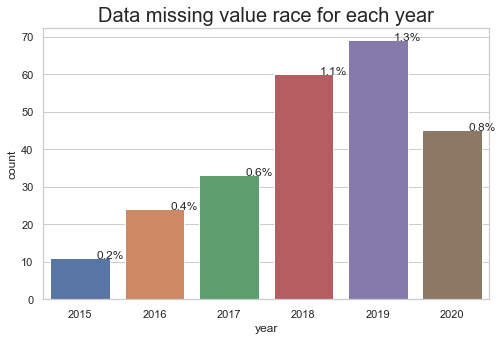

In [107]:
#sns.countplot(ms_race['year'])
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x='year',data=ms_age)
plt.title('Data missing value race for each year', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.show()

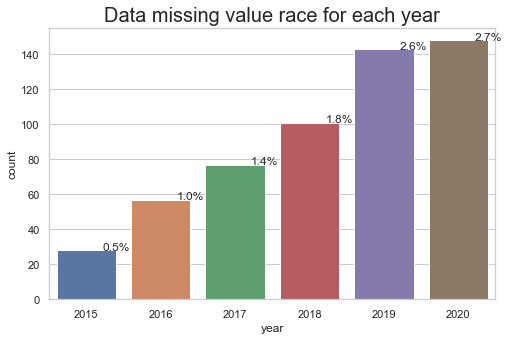

In [25]:
#sns.countplot(ms_race['year'])
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x='year',data=ms_race)
plt.title('Data missing value race for each year', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.show()

In [26]:
# Fill rows missing values for race to Unknown
df.fillna({'race': 'Unknown'}, inplace = True)

Missing values in Race filled with Unknown, for flexibility in analysis. Missing data can reduce the statistical power of a study and can produce biased estimates, leading to invalid conclusions when input in the analysis. Beside that if we delete missing values, some time step are lost.

#### 2.3.2 Flee

In [27]:
ms_flee= df[df['flee'].isnull()]
ms_flee

id               name        date manner_of_death           armed  \
860   1007     Ernesto Gamino  2015-11-13            shot    undetermined   
877   1020  Randy Allen Smith  2015-11-19            shot             gun   
902   1042    Zachary Grigsby  2015-11-29            shot             gun   
939   1083        Roy Carreon  2015-12-12            shot           knife   
940   1086  Efrain Villanueva  2015-12-12            shot  unknown weapon   
...    ...                ...         ...             ...             ...   
5451  5970   Joseph W. Denton  2020-07-06            shot             gun   
5456  5978      Wade Phillips  2020-07-08            shot             gun   
5476  6000       David Martin  2020-07-17            shot             gun   
5488  6009   Christopher Poor  2020-07-25            shot    undetermined   
5491  6010  David Earl Brooks  2020-07-27            shot             gun   

       age gender     race            city state  signs_of_mental_illness  \
860   25.0      M        H   Jurupa Valley    CA                    False   
877   34.0      M        B         Manatee    FL                    False   
902   29.0      M        W         Lincoln    NE                    False   
939   49.0      M        H  San Bernardino    CA                    False   
940    NaN      M  Unknown          Aurora    CO                    False   
...    ...    ...      ...             ...   ...                      ...   
5451  35.0      M        B       Milwaukee    WI                    False   
5456  49.0      M  Unknown    Horry County    SC                    False   
5476  28.0      M  Unknown          Fruita    CO                    False   
5488  49.0      M        W     The Village    OK                    False   
5491  45.0      M        B         Roxboro    NC                    False   

      threat_level flee  body_camera  
860   undetermined  NaN        False  
877         attack  NaN        False  
902         attack  NaN        False  
939         attack  NaN        False  
940         attack  NaN        False  
...            ...  ...          ...  
5451         other  NaN        False  
5456        attack  NaN        False  
5476         other  NaN        False  
5488  undetermined  NaN        False  
5491         other  NaN        False  

[258 rows x 14 columns]

In [28]:
# Fill rows with missing values for flee to Unknown
df.fillna({'flee': 'Unknown'}, inplace = True)

####  2.3.3 Age

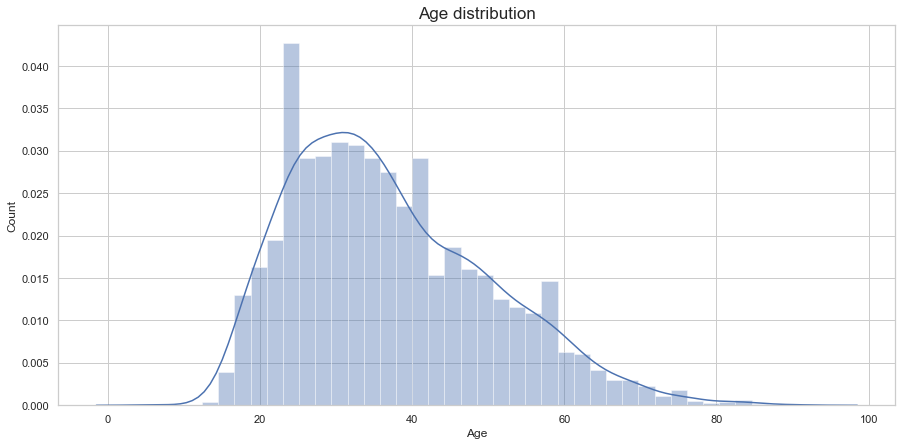

In [29]:
plt.figure(figsize=(15,7))
age_dist = sns.distplot(df["age"], bins=40)
age_dist.set(xlabel="Age", ylabel="Count")

plt.title("Age distribution", fontsize=17);

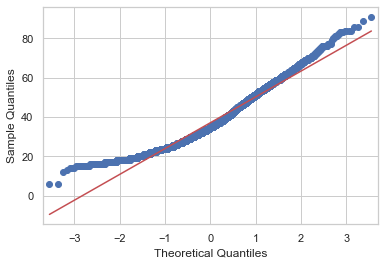

In [30]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot(df['age'].dropna(), line='s')
pyplot.show()

Hypothesis Testing : 
- H0 : The data is normal distributed
- H1 : The data isn't normal distributed

Significance level : 5%

In [31]:
# Normality Test Anderson
from scipy.stats import anderson
result = anderson(df['age'].dropna())
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 58.272
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)


From picture age distribution data seems normal but in QQ plot the data distribution is not around the line test. From the empirical measure normality test anderson we can conclude that data isn't normal distributed. H0 rejected because sig. > 0.05, H1 accepted. Because data age isn't distributed normal, we fill missing value with median age.

In [32]:
# Dealing with missing AGE values. Set them to median of all ages. 
df.age.fillna(value=df.age.median(), inplace=True) 
df.age = df.age.astype(int)

#### 2.3.4 Armed

In [33]:
# Fill Armed as unknowns
df.fillna({'armed': 'Unknown'}, inplace = True)

#### 2.3.5 Gender

In [34]:
# One missing value of 'gender' 
df[df['gender'].isnull()]

id           name        date manner_of_death  armed  age gender race  \
2658  2956  Scout Schultz  2017-09-16            shot  knife   21    NaN    W   

         city state  signs_of_mental_illness threat_level         flee  \
2658  Atlanta    GA                     True        other  Not fleeing   

      body_camera  
2658        False

In [35]:
# Fill 1 missing value for Gender as Male 
df['gender'].fillna('M', inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5495 entries, 0 to 5494
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       5495 non-null   int64 
 1   name                     5495 non-null   object
 2   date                     5495 non-null   object
 3   manner_of_death          5495 non-null   object
 4   armed                    5495 non-null   object
 5   age                      5495 non-null   int32 
 6   gender                   5495 non-null   object
 7   race                     5495 non-null   object
 8   city                     5495 non-null   object
 9   state                    5495 non-null   object
 10  signs_of_mental_illness  5495 non-null   bool  
 11  threat_level             5495 non-null   object
 12  flee                     5495 non-null   object
 13  body_camera              5495 non-null   bool  
dtypes: bool(2), int32(1), int64(1), object(1

### 2.4 Summary Handling Missing Data :
Missing value dataset :
- Race around 10% -> unknown, because if delete many time step missing 
- Flee around 4% -> unknown
- Age around 4%, because age not dist.normal -> fill with median values
- Armed around 3% -> unknown
- Gender (1 person) -> male because (name: Scout Schultz)
- Some missing value replace with unknown for flexibility process when EDA, unknown data can be use into process analysis or not.

## 3. EXPLORATORY DATA ANALYSIS

### 3.1 Date

#### Question : How many victims fatal police shooting 2015-2016?

In [37]:
df_time = df.copy()
df.head()

id                name        date   manner_of_death       armed  age  \
0   3          Tim Elliot  2015-01-02              shot         gun   53   
1   4    Lewis Lee Lembke  2015-01-02              shot         gun   47   
2   5  John Paul Quintero  2015-01-03  shot and Tasered     unarmed   23   
3   8     Matthew Hoffman  2015-01-04              shot  toy weapon   32   
4   9   Michael Rodriguez  2015-01-04              shot    nail gun   39   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleeing        False  
2  Not fleeing        False  
3  Not fleeing        False  
4  Not fleeing        False

In [38]:
## Add column datetime attributes
df_time['date'] = pd.to_datetime(df_time['date'])

# Add year to data
#df.insert(3, 'year', df['date'].apply(lambda x: x.year))
df_time['year'] = df_time['date'].apply(lambda x: x.year)

# Add semester to data
#df.insert(4, 'semester', df['date'].apply(lambda x: ((x.month-1)//6)))
df_time['semester'] = df_time['date'].apply(lambda x: ((x.month-1)//6)+1)

# Add month to data
#df.insert(5, 'month', df['date'].apply(lambda x: x.month))
df_time['month'] = df_time['date'].apply(lambda x: x.month)

# Add month_name to data
#df.insert(6, 'month_name', df['date'].apply(lambda x: x.month_name))
#df['month'] = df['date'].apply(lambda x: x.month)

# Add date_day to data
#df.insert(7, 'date_day', df['date'].apply(lambda x: x.day))
df_time['date_day'] = df_time['date'].apply(lambda x: x.day)

# Add day to data
#df.insert(8, 'day', df['date'].apply(lambda x: x.day_name()))
df_time['day'] = df_time['date'].apply(lambda x: x.day_name())

# Add num_day to data
#df.insert(9, 'num_day', df['date'].apply(lambda x: x.dayofweek))
df_time['num_day'] = df_time['date'].apply(lambda x: x.dayofweek)

##Adding year_semester
#df.insert(10, 'year_semester', df['year'].astype(str)+'/'+df['semester'].astype(str))
df_time['year_semester']=df_time['year'].astype(str)+'/'+df_time['semester'].astype(str) 

##Adding year_month
#df.insert(11, 'year_month', df['year'].astype(str)+'/'+df['month'].astype(str))
df_time['year_month']=df_time['year'].astype(str)+'/'+df_time['month'].astype(str) 

df_time.tail()

id                       name       date manner_of_death    armed  \
5490  6006  Samuel Solomon Cochran Jr 2020-07-26            shot    knife   
5491  6010          David Earl Brooks 2020-07-27            shot      gun   
5492  6007                      TK TK 2020-07-28            shot      gun   
5493  6012               Howard Owens 2020-07-28            shot      gun   
5494  6011                      TK TK 2020-07-29            shot  machete   

      age gender     race        city state  ...         flee body_camera  \
5490   22      M  Unknown    Mt. Airy    NC  ...  Not fleeing       False   
5491   45      M        B     Roxboro    NC  ...      Unknown       False   
5492   35      M  Unknown      Canton    NC  ...  Not fleeing       False   
5493   47      M        W  North Port    FL  ...  Not fleeing       False   
5494   35      M  Unknown   Las Vegas    NV  ...  Not fleeing       False   

      year  semester  month  date_day        day  num_day year_semester  \
5490  2020         2      7        26     Sunday        6        2020/2   
5491  2020         2      7        27     Monday        0        2020/2   
5492  2020         2      7        28    Tuesday        1        2020/2   
5493  2020         2      7        28    Tuesday        1        2020/2   
5494  2020         2      7        29  Wednesday        2        2020/2   

      year_month  
5490      2020/7  
5491      2020/7  
5492      2020/7  
5493      2020/7  
5494      2020/7  

[5 rows x 22 columns]

In [39]:
df_sem = df_time.copy()
df_sem.head()

id                name       date   manner_of_death       armed  age  \
0   3          Tim Elliot 2015-01-02              shot         gun   53   
1   4    Lewis Lee Lembke 2015-01-02              shot         gun   47   
2   5  John Paul Quintero 2015-01-03  shot and Tasered     unarmed   23   
3   8     Matthew Hoffman 2015-01-04              shot  toy weapon   32   
4   9   Michael Rodriguez 2015-01-04              shot    nail gun   39   

  gender race           city state  ...         flee body_camera  year  \
0      M    A        Shelton    WA  ...  Not fleeing       False  2015   
1      M    W          Aloha    OR  ...  Not fleeing       False  2015   
2      M    H        Wichita    KS  ...  Not fleeing       False  2015   
3      M    W  San Francisco    CA  ...  Not fleeing       False  2015   
4      M    H          Evans    CO  ...  Not fleeing       False  2015   

   semester  month  date_day       day  num_day year_semester  year_month  
0         1      1         2    Friday        4        2015/1      2015/1  
1         1      1         2    Friday        4        2015/1      2015/1  
2         1      1         3  Saturday        5        2015/1      2015/1  
3         1      1         4    Sunday        6        2015/1      2015/1  
4         1      1         4    Sunday        6        2015/1      2015/1  

[5 rows x 22 columns]

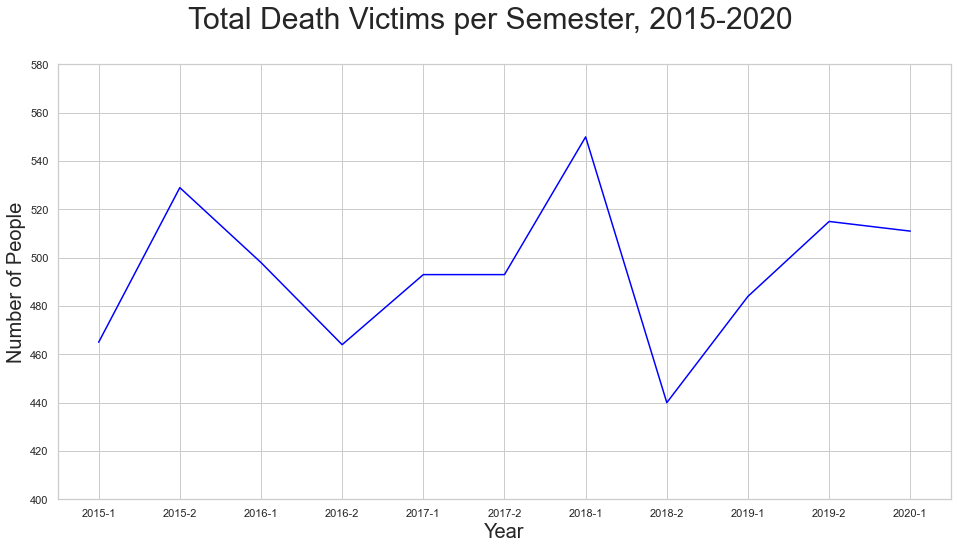

In [40]:
# Plotting Total Death Cases per Semester

# drop semster 2020-2 because data have just 1 month -> 7
df_sem = df_time.copy()
df_sem = df_sem[~df_sem.year_semester.str.contains('2020/2')]

# Graph
fig= plt.subplots(figsize=(16, 8))
plt.suptitle('Total Death Victims per Semester, 2015-2020', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of People', fontsize=20)
x_year = pd.Series(['2015-1','2015-2','2016-1','2016-2','2017-1',
                    '2017-2','2018-1','2018-2','2019-1','2019-2',
                    '2020-1'])
y1_td = df_sem.groupby(['year_semester'])['id'].count()
plt.plot(x_year, y1_td, color='blue')
plt.ylim([400, 580])
plt.show()

Semester from five years of data reveals that the number of fatal shootings and the overall demographics of the victims have remained relatively constant between 440 - 550 number of victims per semester.

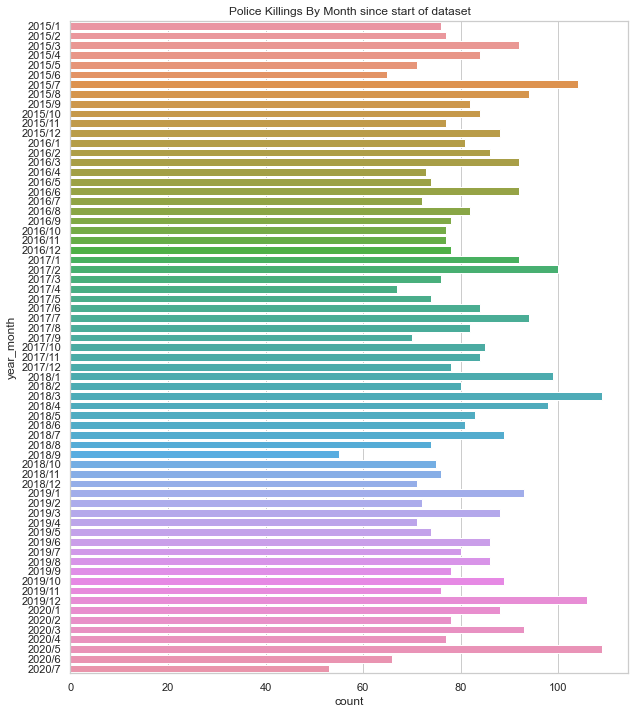

In [41]:
# Plot shootings by month
plt.figure(figsize=(10,12))
sns.countplot(y=df_time.year_month)
plt.title('Police Killings By Month since start of dataset')
plt.show()

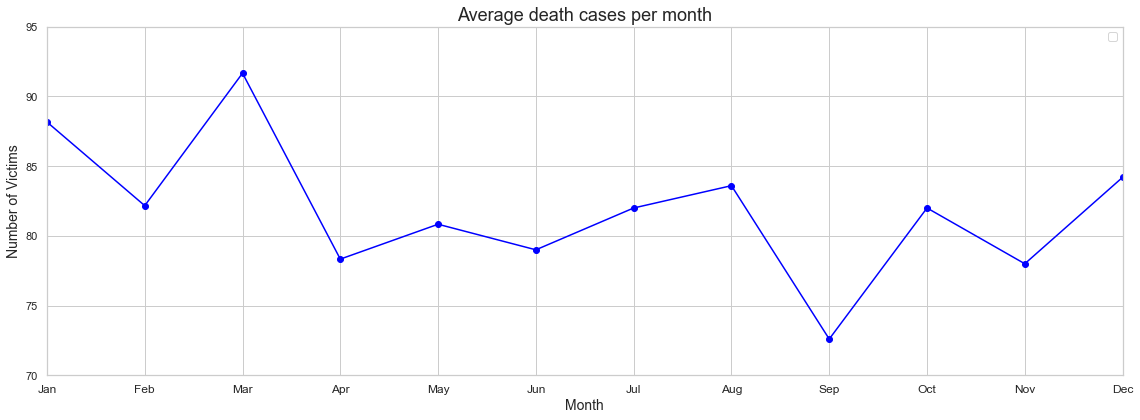

In [42]:
## Plot Average death cases per month'
a = df_time.groupby(['month','year'])['id'].count().to_frame().unstack('year').mean(axis=1).to_frame()
month = pd.Series(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(month, a.values, color='blue', marker="o")
ax.grid(True)
ax.set_xticklabels(labels=month, fontsize=12)
ax.set_ylim(70, 95, 5)
ax.set_xlim('Jan', 'Dec')
ax.legend(labels='')
plt.title(label='Average death cases per month',  fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Victims', fontsize=14)
plt.tight_layout()
plt.show()

Average death cases per month between 72 - 93 number of victims.

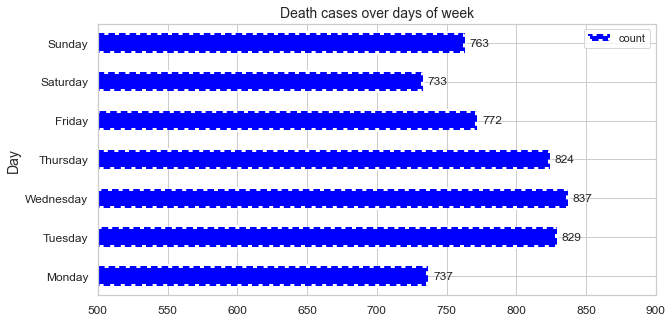

In [43]:
dayofweek=df_time.groupby(['num_day','day'])['id'].count().rename('count').reset_index()
ax=dayofweek.plot(kind='barh',x='day',y='count',
                  linewidth=4,linestyle=':',
                  color='blue',figsize=(10, 5))
plt.title(label='Death cases over days of week', fontsize=14)
plt.legend(loc='best')
ax.set_xlim([500, 900])
ax.tick_params(labelsize=12)
ax.set_ylabel(ylabel='Day', fontsize=14)
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = x_value

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.


plt.show()

The highest is not on holidays but on work days (Thursday, Wednesday and Tuesday).

For analysis time/date, to draw conclusion we need data demonstration or riot. Possibly a large increase in the number of victims if that happens.

In [44]:
dayofweek=df_time.groupby(['num_day','day'])['id'].count().rename('count').reset_index()
dayofweek

num_day        day  count
0        0     Monday    737
1        1    Tuesday    829
2        2  Wednesday    837
3        3   Thursday    824
4        4     Friday    772
5        5   Saturday    733
6        6     Sunday    763

In [45]:
df_time

id                       name       date   manner_of_death  \
0        3                 Tim Elliot 2015-01-02              shot   
1        4           Lewis Lee Lembke 2015-01-02              shot   
2        5         John Paul Quintero 2015-01-03  shot and Tasered   
3        8            Matthew Hoffman 2015-01-04              shot   
4        9          Michael Rodriguez 2015-01-04              shot   
...    ...                        ...        ...               ...   
5490  6006  Samuel Solomon Cochran Jr 2020-07-26              shot   
5491  6010          David Earl Brooks 2020-07-27              shot   
5492  6007                      TK TK 2020-07-28              shot   
5493  6012               Howard Owens 2020-07-28              shot   
5494  6011                      TK TK 2020-07-29              shot   

           armed  age gender     race           city state  ...         flee  \
0            gun   53      M        A        Shelton    WA  ...  Not fleeing   
1            gun   47      M        W          Aloha    OR  ...  Not fleeing   
2        unarmed   23      M        H        Wichita    KS  ...  Not fleeing   
3     toy weapon   32      M        W  San Francisco    CA  ...  Not fleeing   
4       nail gun   39      M        H          Evans    CO  ...  Not fleeing   
...          ...  ...    ...      ...            ...   ...  ...          ...   
5490       knife   22      M  Unknown       Mt. Airy    NC  ...  Not fleeing   
5491         gun   45      M        B        Roxboro    NC  ...      Unknown   
5492         gun   35      M  Unknown         Canton    NC  ...  Not fleeing   
5493         gun   47      M        W     North Port    FL  ...  Not fleeing   
5494     machete   35      M  Unknown      Las Vegas    NV  ...  Not fleeing   

     body_camera  year  semester  month  date_day        day  num_day  \
0          False  2015         1      1         2     Friday        4   
1          False  2015         1      1         2     Friday        4   
2          False  2015         1      1         3   Saturday        5   
3          False  2015         1      1         4     Sunday        6   
4          False  2015         1      1         4     Sunday        6   
...          ...   ...       ...    ...       ...        ...      ...   
5490       False  2020         2      7        26     Sunday        6   
5491       False  2020         2      7        27     Monday        0   
5492       False  2020         2      7        28    Tuesday        1   
5493       False  2020         2      7        28    Tuesday        1   
5494       False  2020         2      7        29  Wednesday        2   

     year_semester  year_month  
0           2015/1      2015/1  
1           2015/1      2015/1  
2           2015/1      2015/1  
3           2015/1      2015/1  
4           2015/1      2015/1  
...            ...         ...  
5490        2020/2      2020/7  
5491        2020/2      2020/7  
5492        2020/2      2020/7  
5493        2020/2      2020/7  
5494        2020/2      2020/7  

[5495 rows x 22 columns]

#### 3.2 Manner of death and body camera

#### Question : What manner of death the most occurs in fatal police shooting?

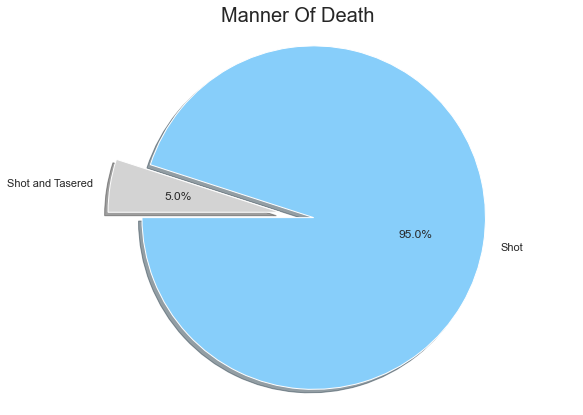

In [46]:
labels = 'Shot','Shot and Tasered'
sizes = df.groupby('manner_of_death')['id'].count().sort_values(ascending=False)
colors = ['lightskyblue', 'lightgrey']
explode = (0, 0.2)  # explode 1st slice

# Plot
fig = plt.figure(figsize =(10, 7))

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.title(label='Manner Of Death', fontsize=20)
plt.axis('equal')
plt.show()

Almost all of the victims died because shot. From pie chart manner of death that victims died because shot and tasered possibly flee but the amount is very small (5%).

#### Question : Do the police always use body camera?

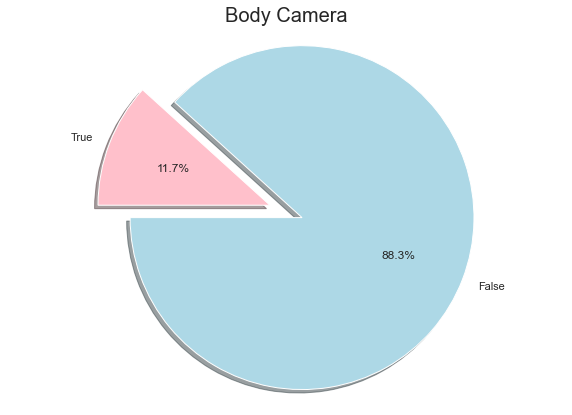

In [47]:
labels ='False','True'
sizes = df.groupby('body_camera')['id'].count().sort_values(ascending=False)
colors = ['lightblue', 'pink']
explode = (0, 0.2)  # explode 1st slice

# Plot
fig = plt.figure(figsize =(10, 7))

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.title(label='Body Camera', fontsize=20)
plt.axis('equal')
plt.show()

From pie chart, we can conclude police mostly not use body camera from data police shooting.

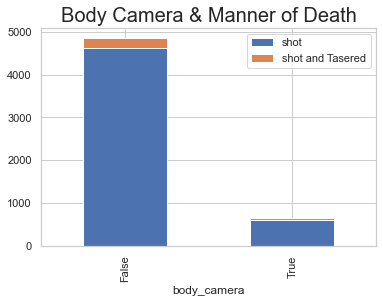

In [48]:
def aggregate(rows,columns,df):
    column_keys = df[columns].unique()
    row_keys = df[rows].unique()

    agg = { key : [ len(df[(df[rows]==value) & (df[columns]==key)]) for value in row_keys]
               for key in column_keys }

    aggdf = pd.DataFrame(agg,index = row_keys)
    aggdf.index.rename(rows,inplace=True)

    return aggdf


aggregate('body_camera','manner_of_death',df).plot(kind='bar',stacked=True);
plt.title(label='Body Camera & Manner of Death', fontsize=20)
plt.show()

From body camera and manner of death chart, we can conclude that manner of death victims becuse shoot, police mostly not use body camera. For draw conclusion police US compliance use body camera, we need to compare with data non fatal police shooting.

#### 3.3 Flee & Armed

Question : Are victims run away from police or they are trying to flee?

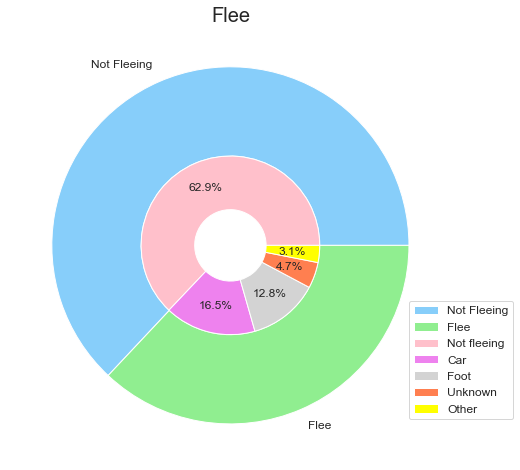

In [49]:
c =  df['flee'].value_counts(normalize=True).to_frame().T

# Plot the double donut pie 
fig, ax = plt.subplots(figsize=(8,8))
plt.axis('equal')

all_val = [c.iloc[0][i] for i in c]
ax1 = plt.pie([0.63, 0.37], radius=1,
        colors=['lightskyblue', 'lightgreen'],
        pctdistance=0.7,
        wedgeprops=dict(width=0.5, edgecolor='white'),
        labels=['Not Fleeing', 'Flee'],
        textprops={'fontsize': 12})

ax2 = plt.pie(all_val, radius=0.5,
        colors=['pink','violet','lightgrey','coral','yellow'],
        wedgeprops=dict(width=0.3, edgecolor='white'),
        autopct='%.1f%%',
        pctdistance=0.7, 
        labeldistance=0.7)

handles, labels = ax.get_legend_handles_labels()
leg_labels = ['Not Fleeing', 'Flee', 'Not fleeing', 'Car', 'Foot', 'Unknown', 'Other']
plt.title(label='Flee', fontsize=20)
plt.legend(labels=leg_labels, loc=(0.9, 0.1), fontsize=12)
plt.show()

From flee chart, number of victims flee and not fleeing is 47,1% and 62,9%. Quite a lot of victims who did not run away but were shot.

In [50]:
c =  df['flee'].value_counts(normalize=True).to_frame().T
c

Not fleeing       Car      Foot   Unknown     Other
flee     0.629299  0.165059  0.127753  0.046952  0.030937

In [51]:
all_val = [c.iloc[0][i] for i in c]
all_val

[0.6292993630573248,
 0.16505914467697907,
 0.12775250227479526,
 0.04695177434030937,
 0.030937215650591446]

Question : Are victim using or carrying weapons or armed threatens the police safety?

In [52]:
## Add column risk_armed (categorized armed)
V_L = ['Unarmed',  'flashlight', 'air conditioner']

L = ['screwdriver', 'Taser', 'metal pipe', 'metal hand tool', 'blunt object', "contractor's level", 'unknown weapon', 
     'stapler', 'bean-bag gun', 'straight edge razor', 'brick', 'hand torch', 'scissors', 'chair', 'rock', 
     'piece of wood', 'pipe', 'oar', 'fireworks', 'pen', 'walking stick', 'barstool', 'pepper spray', 'wasp spray']

M = ['metal object', 'knive', 'box cutter', 'vehicle', 'lawn mower blade', 'flagpole', 'crossbow', 'metal pole', 
     'cordless drill', 'metal stick', 'sharp object', 'meat cleaver', 'carjack', 'chain', 'beer bottle', 
     'baseball bat and fireplace poker', 'baseball bat', 'garden tool', 'pole', 'baton', 'glass shard', 
     'motorcycle', 'tire iron', 'baseball bat and bottle', 'claimed to be armed', 'wrench', 'Airsoft pistol', 'ice pick']

S = ['hatchet', 'machete', 'shovel', 'hammer', 'nail gun', 'ax', 'chain saw', 'pick-axe', 'spear', 'pitchfork', 
     'bayonet', 'spear', 'crowbar', 'pole and knife', 'chainsaw', 'incendiary device', 'samurai sword', 
     'bow and arrow', 'baseball bat and knife', 'vehicle and machete','car, knife and mace']

H = [ 'gun', 'toy weapon', 'sword', 'guns and explosives', 'gun and knife', 'hatchet and gun', 'machete and gun', 
     'gun and sword', 'gun and car', 'pellet gun', 'BB gun', 'gun and vehicle', 'vehicle and gun', 'grenade', 
     'BB gun and vehicle', 'air pistol']

U = ['undetermined', 'nan']

risk_armed = []

for item in df['armed']:
    if item in H:
        risk_armed.append('High')
    elif item in S:
        risk_armed.append('Serious')
    elif item in M:
        risk_armed.append('Medium')
    elif item in L:
        risk_armed.append('Low')
    elif item in V_L:
        risk_armed.append('Very Low')
    else:
        risk_armed.append('Unknown')
        
# df['risk_armed'] = risk_armed
df.insert(5, 'risk_armed', risk_armed)
df.head()

id                name        date   manner_of_death       armed  \
0   3          Tim Elliot  2015-01-02              shot         gun   
1   4    Lewis Lee Lembke  2015-01-02              shot         gun   
2   5  John Paul Quintero  2015-01-03  shot and Tasered     unarmed   
3   8     Matthew Hoffman  2015-01-04              shot  toy weapon   
4   9   Michael Rodriguez  2015-01-04              shot    nail gun   

  risk_armed  age gender race           city state  signs_of_mental_illness  \
0       High   53      M    A        Shelton    WA                     True   
1       High   47      M    W          Aloha    OR                    False   
2    Unknown   23      M    H        Wichita    KS                    False   
3       High   32      M    W  San Francisco    CA                     True   
4    Serious   39      M    H          Evans    CO                    False   

  threat_level         flee  body_camera  
0       attack  Not fleeing        False  
1       attack  Not fleeing        False  
2        other  Not fleeing        False  
3       attack  Not fleeing        False  
4       attack  Not fleeing        False

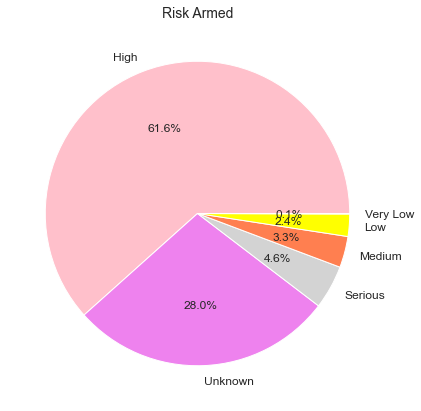

In [53]:
#group by manner_of_death to find relations
df_armed=df.groupby('risk_armed')['id'].count().sort_values(ascending=False)

fig, ax= plt.subplots(figsize=(6,6))
ax = df_armed.plot.pie(labels=df['risk_armed'].unique(),
                                 autopct='%1.1f%%', 
                                 colors=['pink','violet','lightgrey',
                                         'coral','yellow','limegreen'],
                                 fontsize=12)
plt.title(label='Risk Armed', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()

From pie chart risk armed, 61,6% victims are using or carrying weapons that high risk armed. Maybe high, seroious and medium risk armed was the reason the police shot the victims. 2,5% from victims that have very low and low risk armed. But data unknown armed victims quite a lot (28%).

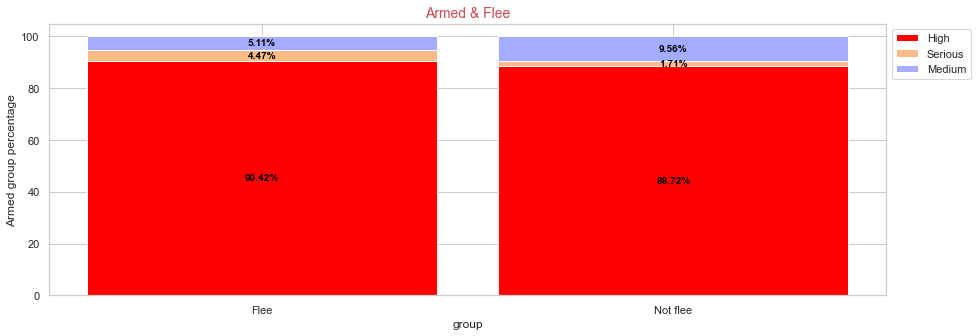

In [54]:
def flee(grp):
  if grp in ('Not fleeing'):
    return 0
  else:
    return 1

df['flee_grp']=df['flee'].apply(lambda grp: flee(grp))

df_af=df.groupby(['risk_armed','flee_grp'])['id'].count().rename('count').reset_index()
fig, ax = plt.subplots(figsize=(15, 5))
redBars=list(df_af.loc[df_af['risk_armed']=='High']['count'])
orangeBars=list(df_af.loc[df_af['risk_armed']=='Serious']['count'])
blueBars=list(df_af.loc[df_af['risk_armed']=='Medium']['count'])

## Data
r = [0,1]
raw_data = {'redBars':redBars, 'orangeBars': orangeBars,'blueBars':blueBars}
df_bar = pd.DataFrame(raw_data)
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df_bar['redBars'], df_bar['orangeBars'], df_bar['blueBars'])]
redBars = [i / j * 100 for i,j in zip(df_bar['redBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df_bar['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df_bar['blueBars'], totals)]

# plot
barWidth = 0.85
names = ('Flee','Not flee')
# Create green Bars
ax1=plt.bar(r, redBars, color='red', edgecolor='white',
            width=barWidth, label='High')
# Create orange Bars
ax2=plt.bar(r, orangeBars, bottom=redBars, color='#f9bc86', 
            edgecolor='white', width=barWidth, label='Serious')
# Create blue Bars
ax3=plt.bar(r, blueBars, bottom=[i+j for i,j in zip(redBars, orangeBars)],
            color='#a3acff', edgecolor='white', width=barWidth, label='Medium')

plt.ylabel("Armed group percentage")
for r1, r2, r3 in zip(ax1, ax2, ax3):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2.,
             "{:.2%}".format(h1/100), 
             ha="center", va="center",
             color="black", fontsize=10, fontweight="bold" )
    plt.text(r2.get_x() + r2.get_width() / 2.,
             h1 + h2 / 2., "{:.2%}".format(h2/100), 
             ha="center", va="center",
             color="black", fontsize=10, fontweight="bold")
    plt.text(r3.get_x() + r3.get_width() / 2.,
             h1 + h2 + h3 / 2., "{:.2%}".format(h3/100), 
             ha="center", va="center",
             color="black", fontsize=10, fontweight="bold")
#################################################
# # Custom x axis

plt.xticks(r, names)
plt.xlabel("group")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Armed & Flee', fontsize=14, color='r')
# Show graphic
plt.show()

From armed and flee chart, percentage armed risk serious in group flee 90,4% and not flee around 88.7%, seems like there is no strong connection between risk armed with flee.

In [55]:
df['flee_grp']

0       0
1       0
2       0
3       0
4       0
       ..
5490    0
5491    1
5492    0
5493    0
5494    0
Name: flee_grp, Length: 5495, dtype: int64

In [56]:
df_af=df.groupby(['risk_armed','flee_grp'])['id'].count().rename('count').reset_index()
df_af

risk_armed  flee_grp  count
0        High         0   2143
1        High         1   1243
2         Low         0    123
3         Low         1     59
4      Medium         0    121
5      Medium         1    134
6     Serious         0    106
7     Serious         1     24
8     Unknown         0    962
9     Unknown         1    577
10   Very Low         0      3

In [57]:
redBars=list(df_af.loc[df_af['risk_armed']=='High']['count'])
redBars

[2143, 1243]

#### 3.4 Gender & Mental illness

Question : Haw many victims fatal police shooting by gender in 2015 - 2020?

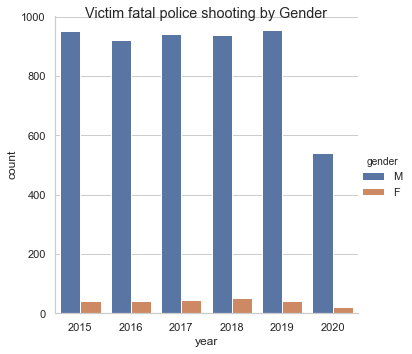

In [58]:
ax = sns.catplot(x="year", kind="count", hue='gender', data=df_time)
ax.fig.suptitle("Victim fatal police shooting by Gender")
#ax.set_ylabel("Number of Victims")
plt.show()

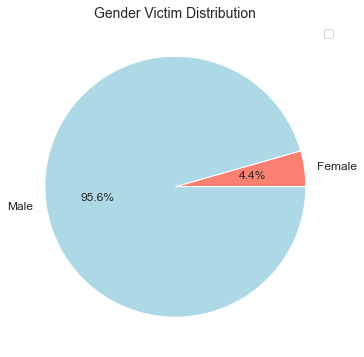

In [59]:
#group by gender to find relations
df_gender=df.groupby('gender')['id'].count().rename('count').reset_index()
ax = df_gender.plot.pie(y='count',labels=['Female','Male'],
                   autopct='%1.1f%%',
                   colors=['salmon','lightblue'],
                   figsize=(6,6), fontsize=12)
ax.set_title("Gender Victim Distribution", fontsize=14)
ax.legend(labels='')
plt.ylabel('')
plt.show()

In [60]:
df_gender=df.groupby('gender')['id'].count().rename('count').reset_index()
df_gender

gender  count
0      F    244
1      M   5251

Most of the victims from year to year is a male.

Question : How many victims have mental issue?

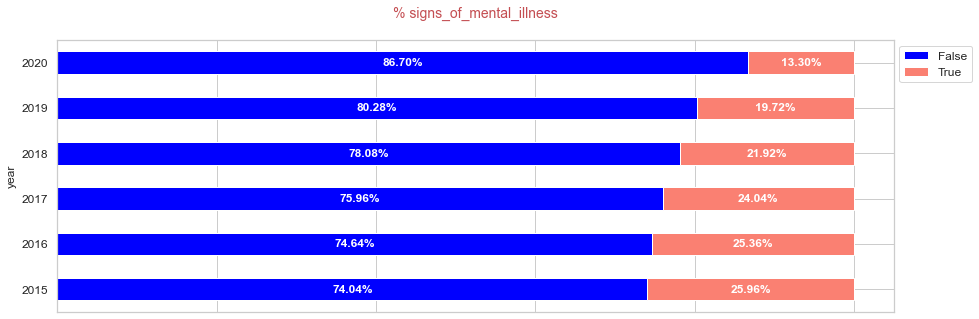

In [61]:
# Ploting a bar chart of the attribute
table = pd.crosstab(df_time['year'], df['signs_of_mental_illness'], normalize=0)
ax = table.plot(kind='barh',stacked=True, color=['blue','salmon'], figsize=(15, 5))

labels = []
for j in table.columns:
    for i in table.index:
        label = str('{0:.2%}'.format(table.loc[i][j]))
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', 
                va='center', color='white', weight='bold')

ax.set_xticklabels(labels='')
ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=12)

plt.legend(loc='best')
plt.title('% signs_of_mental_illness\n', fontsize=14, color='r')
plt.legend(bbox_to_anchor=(1.1, 1.0), fontsize=12)
plt.show()

The prevalence of mental illness among fatal police shooting annual decrease from 2015 to 2020, but data 2020 has partial data (7 month). The victims that has mental ilness around 19% - 25%.

In [62]:
table = pd.crosstab(df_time['year'], df['signs_of_mental_illness'], normalize=0)
table

signs_of_mental_illness     False     True 
year                                       
2015                     0.740443  0.259557
2016                     0.746362  0.253638
2017                     0.759635  0.240365
2018                     0.780808  0.219192
2019                     0.802803  0.197197
2020                     0.867021  0.132979

#### 3.5 Age, Mental Illness & Flee

Question: Number of fatal police shooting by age?

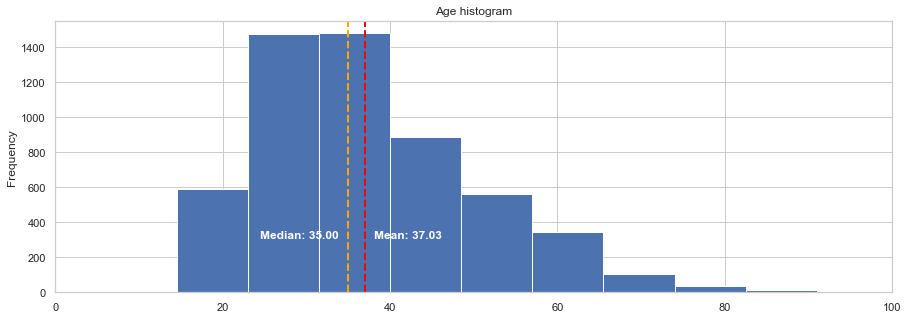

In [63]:
ax1 = df['age'].plot(kind='hist',bins=10, figsize=(15, 5))
ax1.axvline(x=df['age'].mean(), ymin=0, ymax=1, color='red',
                                                    linewidth=2,
                                                    linestyle='dashed')
ax1.axvline(x=df['age'].median(), ymin=0, ymax=1, color='orange',
                                                    linewidth=2,
                                                    linestyle='dashed')
min_ylim, max_ylim = plt.ylim()
plt.text(df['age'].mean()*1.03, max_ylim*0.2, 'Mean: {:.2f}'.format(df['age'].mean()),
                                                                      color='w', weight='bold')
plt.text(df['age'].median()*0.7, max_ylim*0.2, 'Median: {:.2f}'.format(df['age'].median()),
                                                                      color='w', weight='bold')

plt.title(label='Age histogram', fontsize=12)
plt.xlim([0, 100])
plt.show()

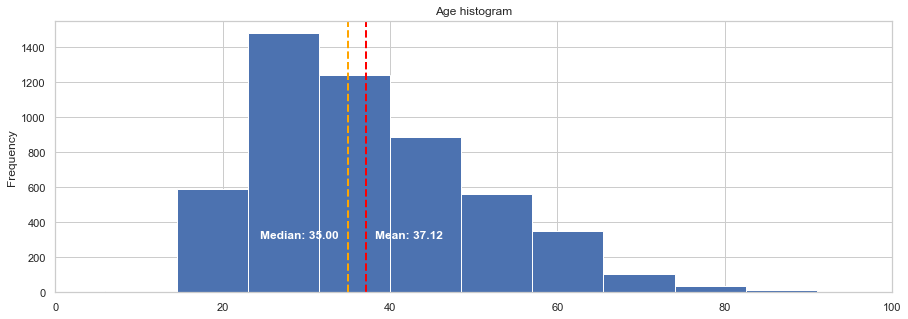

In [109]:
data = pd.read_csv('fatal-police-shootings-data.csv')
df = data.copy()
ax1 = df['age'].dropna().plot(kind='hist',bins=10, figsize=(15, 5))
ax1.axvline(x=df['age'].mean(), ymin=0, ymax=1, color='red',
                                                    linewidth=2,
                                                    linestyle='dashed')
ax1.axvline(x=df['age'].median(), ymin=0, ymax=1, color='orange',
                                                    linewidth=2,
                                                    linestyle='dashed')
min_ylim, max_ylim = plt.ylim()
plt.text(df['age'].mean()*1.03, max_ylim*0.2, 'Mean: {:.2f}'.format(df['age'].mean()),
                                                                      color='w', weight='bold')
plt.text(df['age'].median()*0.7, max_ylim*0.2, 'Median: {:.2f}'.format(df['age'].median()),
                                                                      color='w', weight='bold')

plt.title(label='Age histogram', fontsize=12)
plt.xlim([0, 100])
plt.show()

The majority of victims occurs at the age group of 30-60. But few cases where the age below 10 and above 80.

In [64]:
df_age=df.groupby('age')['id'].count().rename('count').reset_index().T
df_age

0   1   2   3   4   5   6   7   8   9   ...  67  68  69  70  71  72  \
age     6  12  13  14  15  16  17  18  19  20  ...  78  79  80  81  82  83   
count   2   1   1   3  13  31  49  96  86  96  ...   1   1   2   3   2   3   

       73  74  75  76  
age    84  86  89  91  
count   4   2   1   1  

[2 rows x 77 columns]

<AxesSubplot:xlabel='count', ylabel='age'>

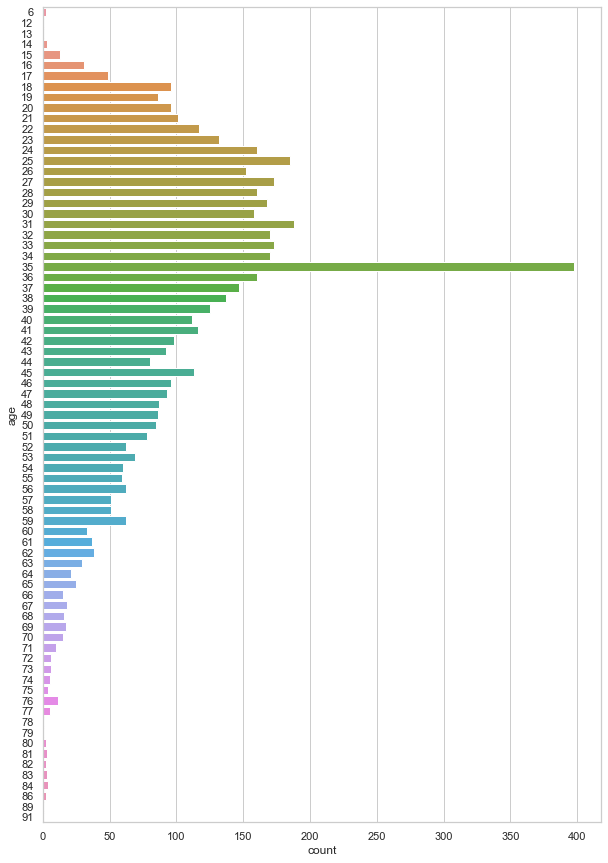

In [65]:
plt.figure(figsize=(10,15))
sns.countplot(y=df.age)

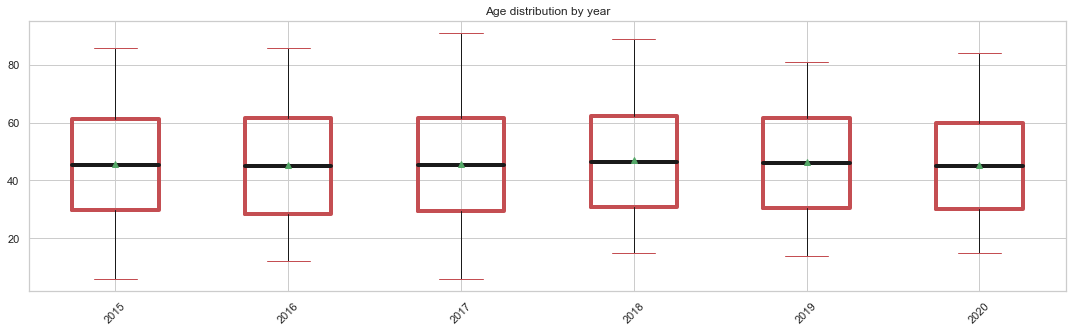

In [66]:
boxprops = dict(linestyle='-', linewidth=4, color='r')
medianprops = dict(linestyle='-', linewidth=4, color='r')
z = df_time.groupby(['year','age'])['id'].count().rename('count').reset_index()
ax=z.boxplot(by='year',color=dict(boxes='r',whiskers='k', medians='k',caps='r'),
             grid=True,column='age',rot=45,
             showfliers=False, showmeans=True,
             boxprops=boxprops,                                                                                    
             medianprops=medianprops,
             figsize=(18,5))
plt.suptitle("")
ax.set_xlabel("")
ax.set_title("Age distribution by year")
plt.show()

From boxplot, he thick black line is median. The median seems has almost same level for each year.

Question: Data distribution year based on age?

Text(0.5, 1.0, 'Distribution age by year')

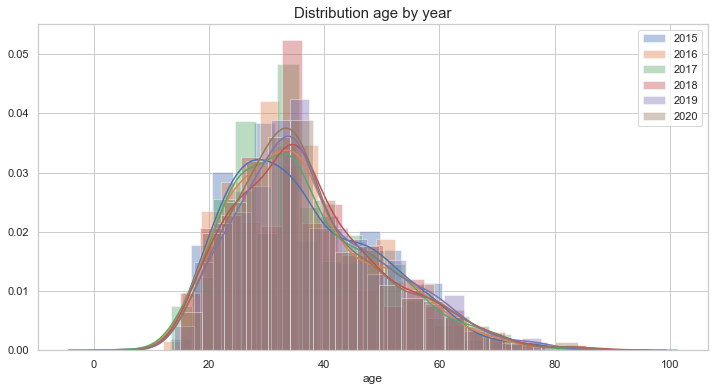

In [67]:
plt.figure(figsize=(12,6))
for item in df_time.year.unique():
    sns.distplot(df_time[df_time['year'] == item]['age'], label = item)
    plt.legend()
plt.title('Distribution age by year', fontsize=15)

Hypothesis Testing : 
- H0 : The data is normal distributed
- H1 : The data isn't normal distributed

Significance level : 5%

In [68]:
# Normality Test Anderson
for item in df_time.year.unique():
    result = anderson(df_time[df_time['year'] == item]['age'])
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 11.907
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.653, data does not look normal (reject H0)
5.000: 0.784, data does not look normal (reject H0)
2.500: 0.914, data does not look normal (reject H0)
1.000: 1.088, data does not look normal (reject H0)
Statistic: 11.094
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.653, data does not look normal (reject H0)
5.000: 0.784, data does not look normal (reject H0)
2.500: 0.914, data does not look normal (reject H0)
1.000: 1.088, data does not look normal (reject H0)
Statistic: 11.701
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.653, data does not look normal (reject H0)
5.000: 0.784, data does not look normal (reject H0)
2.500: 0.914, data does not look normal (reject H0)
1.000: 1.088, data does not look normal (reject H0)
Statistic: 11.155
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.653, data does not look normal (reject H0)
5.000: 0.784, data does not look nor

From distribution chart, data years by age seems not normal but we need test with empirical measure. From empirical measure normality test anderson we can conclude that data isn't normal distributed. H0 rejected because sig. > 0.05, H1 accepted. Because data age isn't distributed normal, we analyze use non-parametric test (Kruskall-wallis -> post-hoc tests).

**Kruskall-wallis test**

Hypothesis :

H0 : There are no significant difference between age by years

H1 : There are significant difference between age by years

Significance level : 5%

In [69]:
from pingouin import kruskal
from pingouin import pairwise_ttests
kruskal(data=df_time, dv='age', between='year')

Source  ddof1         H     p-unc
Kruskal   year      5  9.504874  0.090543

Conclusion is the p-value greater than our sig.level (alpha=0.05), it means we have evidence to accept H0. There are no significance difference between age by years. If H0 accepted, we don't need post hoc test.

Question : Are age influence flee or not flee?

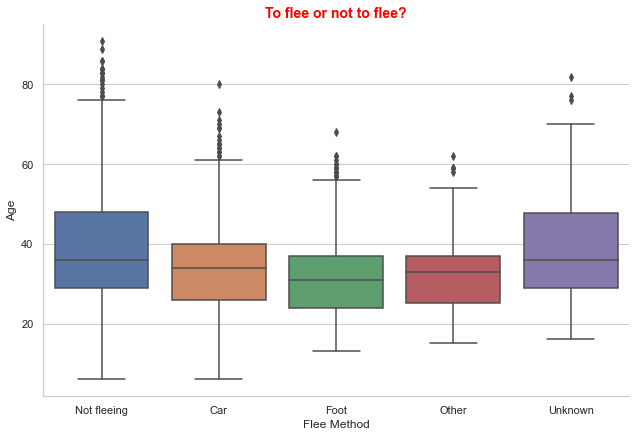

In [70]:
f = df[['age','threat_level','flee','gender']]
ax = sns.catplot(x='flee', y="age", 
                 kind="box", data=f, height=6, aspect=1.5)
ax.set(xlabel='Flee Method', ylabel='Age')
plt.title('To flee or not to flee?', 
          fontdict={'size': 14, 'color':'red', 'weight': 'bold'})
x = 1
y = 30
plt.show()

Younger flee people tends to flee by foot. Missing data (unknown), is similar to "not fleeing", probably associated with not fleeing.

Question: Data distribution flee based on age?

Text(0.5, 1.0, 'Distribution age by flee')

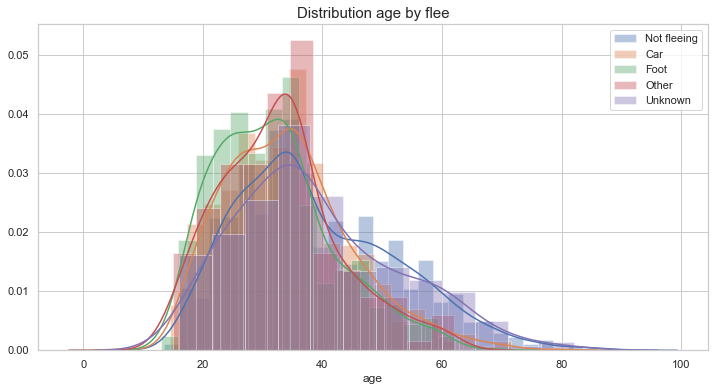

In [71]:
plt.figure(figsize=(12,6))
for item in df.flee.unique():
    sns.distplot(df[df['flee'] == item]['age'], label = item)
    plt.legend()
plt.title('Distribution age by flee', fontsize=15)

Hypothesis Testing : 
- H0 : The data is normal distributed
- H1 : The data isn't normal distributed

Significance level : 5%

In [72]:
# Normality Test Anderson
for item in df.flee.unique():
    result = anderson(df[df['flee'] == item]['age'].dropna())
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 35.660
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)
Statistic: 6.384
15.000: 0.573, data does not look normal (reject H0)
10.000: 0.653, data does not look normal (reject H0)
5.000: 0.784, data does not look normal (reject H0)
2.500: 0.914, data does not look normal (reject H0)
1.000: 1.087, data does not look normal (reject H0)
Statistic: 6.705
15.000: 0.573, data does not look normal (reject H0)
10.000: 0.652, data does not look normal (reject H0)
5.000: 0.783, data does not look normal (reject H0)
2.500: 0.913, data does not look normal (reject H0)
1.000: 1.086, data does not look normal (reject H0)
Statistic: 1.392
15.000: 0.563, data does not look normal (reject H0)
10.000: 0.641, data does not look normal (reject H0)
5.000: 0.770, data does not look normal

From picture, data flee by age seems not normal but we need test with empirical measure. From empirical measure normality test anderson we can conclude that data isn't normal distributed. H0 rejected because sig. > 0.05, H1 accepted. Because data age isn't distributed normal, we analyze use non-parametric test (Kruskall-wallis -> post-hoc tests).

**Kruskall-wallis test**

Hypothesis :

H0 : There are no significant difference between age by flee

H1 : There are significant difference between age by flee

Significance level : 5%

In [73]:
from pingouin import kruskal
from pingouin import pairwise_ttests
kruskal(data=df, dv='age', between='flee')

Source  ddof1           H         p-unc
Kruskal   flee      4  226.379528  7.942133e-48

Conclusion is the p-value lower than our sig.level (alpha=0.05), it means we have evidence to accept H1. There are significance difference between age by flee. If H1 accepted, next we need do post hoc test.

**Post-hoc test (mann-whitney-u)**
Hypothesis :

H0 : There were no significant differences between the two groups

H1 : There were significant differences between the two groups

Significance level : 5%

In [74]:
pairwise_ttests(data=df, dv='age', between='flee', parametric=False)

Contrast            A        B  Paired  Parametric      U-val       Tail  \
0     flee  Not fleeing      Car   False       False  1862183.0  two-sided   
1     flee  Not fleeing     Foot   False       False  1583896.0  two-sided   
2     flee  Not fleeing    Other   False       False   369155.5  two-sided   
3     flee  Not fleeing  Unknown   False       False   446710.5  two-sided   
4     flee          Car     Foot   False       False   360576.0  two-sided   
5     flee          Car    Other   False       False    83043.0  two-sided   
6     flee          Car  Unknown   False       False    95550.0  two-sided   
7     flee         Foot    Other   False       False    56041.5  two-sided   
8     flee         Foot  Unknown   False       False    63067.5  two-sided   
9     flee        Other  Unknown   False       False    16308.0  two-sided   

          p-unc    hedges  
0  3.141111e-18  0.356475  
1  2.638027e-37  0.540848  
2  1.659851e-08  0.462320  
3  9.698529e-01  0.006716  
4  4.866754e-06  0.227062  
5  1.098170e-01  0.143713  
6  6.746743e-06 -0.394411  
7  2.179078e-01 -0.084125  
8  5.103192e-13 -0.622675  
9  7.028427e-06 -0.494680

From posthoc test, we can conclude that were no significance difference between group not fleeing & unknown. H0 accepted because p-value group fleeing & unknown greater than significance level (H1 rejected). 

For other group were significance difference between  groups. H1 accepted because p-value group fleeing & unknown lower than significance level (H0 rejected). 

#### 3.6 Race

Question: Number of fatal police shooting by race ?

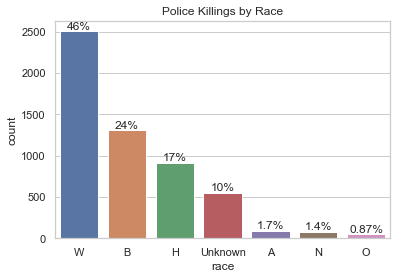

In [75]:
# Plot police killings by race
ax = sns.countplot(x="race", data=df,
                   order = df.race.value_counts().index)
for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2g}%'.format(100.*y/len(df)), (x.mean(), y), ha='center', va='bottom')
plt.title('Police Killings by Race')
plt.show()

From figure we can conclude that victims many from white, black and hispanic race. For column "race" there were initally 10% percent NAN values in the data.

In [76]:
import plotly.graph_objs as go #importing graphical objects
race_data = pd.read_csv('Race distrebution 2017.csv')
race_data=race_data.rename(columns={'RaceCode':'race'})
df_race=df.groupby(['race'])['id'].count().rename('count').reset_index()
df_race=df_race[~df_race['race'].isin(['N','A','Unknown', 'O'])]
d=df_race.sort_values(by=['race','count'],ascending=False)
d['Percentage']=d['count']/d['count'].sum()
d['Percentage']=d['Percentage'].map(lambda n: '{:,.2%}'.format(n))
d=d.drop_duplicates()
d=pd.merge(d.reset_index(), race_data.reset_index(), on=['race'], how='left')
d['normalized']=d['count']/d['Quantity']*100000
d.sort_values(by='normalized',inplace=True)
colors = ['lightslategray',] * 5
colors[3] = 'crimson'
fig = go.Figure(data=[go.Bar(x=d['race'],y=d['normalized'],width=[1, 2, 0.9, 1])])
fig.update_layout(title="Race Death Normalization per 100,000 in Population",
    xaxis_title="Race",
    xaxis = dict(tickmode = 'array',
                 tickvals = ['B', 'H', 'W', 'O'],
                 ticktext = ['Black','Hispanic','White','Other']),
    yaxis_title="Deaths per 100,000")

fig.update_traces(marker_color=colors, marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.show()

We analyze race that have the most victims (above 17%) and the other race not include in teh analysis. We normalize data with race distribution 2017. Assume data race distribution 2017 is not much different with data 2015, 2016, 2018, 2019, 2020. From race death normalization chart we can conclude, if you are a black person there is 3 times bigger chance you will get killed by a police officer than a white guy, eventhough Black people are only 13% of the US population.

In [77]:
d

index_x race  count Percentage  index_y                       Race  \
0        6    W   2505     53.06%        0                      White   
1        2    H    910     19.28%        2                   Hispanic   
2        1    B   1306     27.66%        1  Black or African American   

      Quantity percentage  normalized  
0  197000000.0     60.24%    1.271574  
1   39000000.0     11.93%    2.333333  
2   42000000.0     12.84%    3.109524

In [78]:
race_data = pd.read_csv('Race distrebution 2017.csv')
race_data=race_data.rename(columns={'RaceCode':'race'})
df_race=df.groupby(['race'])['id'].count().rename('count').reset_index()
df_race=df_race[~df_race['race'].isin(['N','A','Unknown', 'O'])]
df_race

race  count
1    B   1306
2    H    910
6    W   2505

In [79]:
d=df_race.sort_values(by=['race','count'],ascending=False)
d['Percentage']=d['count']/d['count'].sum()
d['Percentage']=d['Percentage'].map(lambda n: '{:,.2%}'.format(n))
d=d.drop_duplicates()
d

race  count Percentage
6    W   2505     53.06%
2    H    910     19.28%
1    B   1306     27.66%

In [80]:
d=pd.merge(d.reset_index(), race_data.reset_index(), on=['race'], how='left')
d

index_x race  count Percentage  index_y                       Race  \
0        6    W   2505     53.06%        0                      White   
1        2    H    910     19.28%        2                   Hispanic   
2        1    B   1306     27.66%        1  Black or African American   

      Quantity percentage  
0  197000000.0     60.24%  
1   39000000.0     11.93%  
2   42000000.0     12.84%

In [81]:
d['normalized']=d['count']/d['Quantity']*100000
d.sort_values(by='normalized',inplace=True)
d

index_x race  count Percentage  index_y                       Race  \
0        6    W   2505     53.06%        0                      White   
1        2    H    910     19.28%        2                   Hispanic   
2        1    B   1306     27.66%        1  Black or African American   

      Quantity percentage  normalized  
0  197000000.0     60.24%    1.271574  
1   39000000.0     11.93%    2.333333  
2   42000000.0     12.84%    3.109524

#### 3.7 State

Question: Which state that had the most fatal police shooting?

In [96]:
pop = pd.read_csv('USpop2019.csv',thousands=',')

# merge the data of population according to state abbervation
data_state = pd.merge(df, pop)

# calculate the value of normalized incidents per 100,000 population for each row
data_state['incidents'] = data_state.groupby('state')['state'].transform('count')
data_state['state_norm'] = data_state['incidents'] / data_state['2019'] * 100000

## Menghapus kolom Unnamed 20-220
for item in range (3,9):
    z = ''
    z += 'Unnamed: '
    z += str(item)
    data_state.drop(z, axis=1,  inplace=True)
    
data_state

id                     name        date   manner_of_death       armed  \
0        3               Tim Elliot  2015-01-02              shot         gun   
1      138  Antonio Zambrano-Montes  2015-02-10  shot and Tasered     unarmed   
2      295       Jamison  Childress  2015-03-19              shot     unarmed   
3      393       Daniel Covarrubias  2015-04-21              shot     unarmed   
4      431               Roark Cook  2015-05-04              shot  toy weapon   
...    ...                      ...         ...               ...         ...   
5490  5081    Christopher G. Louras  2019-10-01              shot         gun   
5491  1405          Dominique Silva  2016-03-24              shot  toy weapon   
5492  1621          Edward Acquisto  2016-06-13              shot         gun   
5493  3119            Joseph Santos  2017-11-09              shot     Unknown   
5494  4023             DaShawn Cole  2018-09-07              shot         gun   

     risk_armed  age gender race        city state  signs_of_mental_illness  \
0          High   53      M    A     Shelton    WA                     True   
1       Unknown   35      M    H       Pasco    WA                     True   
2       Unknown   20      M    W       Sumas    WA                     True   
3       Unknown   37      M    N    Lakewood    WA                     True   
4          High   36      M    W   Kennewick    WA                     True   
...         ...  ...    ...  ...         ...   ...                      ...   
5490       High   34      M    W     Rutland    VT                    False   
5491       High   24      M    B   Pawtucket    RI                    False   
5492       High   80      M    H    Tiverton    RI                    False   
5493    Unknown   32      M    W  Providence    RI                    False   
5494       High   28      M    B   Pawtucket    RI                    False   

     threat_level         flee  body_camera  flee_grp    state_name     2019  \
0          attack  Not fleeing        False         0    Washington  7614893   
1           other         Foot        False         1    Washington  7614893   
2          attack  Not fleeing        False         0    Washington  7614893   
3           other         Foot        False         1    Washington  7614893   
4          attack  Not fleeing        False         0    Washington  7614893   
...           ...          ...          ...       ...           ...      ...   
5490       attack          Car        False         1       Vermont   623989   
5491       attack         Foot        False         1  Rhode Island  1059361   
5492       attack          Car        False         1  Rhode Island  1059361   
5493       attack          Car         True         1  Rhode Island  1059361   
5494       attack      Unknown        False         1  Rhode Island  1059361   

      incidents  state_norm  
0           153    2.009221  
1           153    2.009221  
2           153    2.009221  
3           153    2.009221  
4           153    2.009221  
...         ...         ...  
5490          9    1.442333  
5491          4    0.377586  
5492          4    0.377586  
5493          4    0.377586  
5494          4    0.377586  

[5495 rows x 20 columns]

In [83]:
state_data = data_state.copy()
import plotly.graph_objs as go

fig = go.Figure(data=go.Choropleth(
    locations= state_data['state'], # Spatial coordinates
    z = state_data['incidents'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "# incidents",
))

fig.update_layout(
    title_text = 'Incidents By state: Choropleth',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

From figure we can conclude that California(CA), Texas (TX), Florida (FL) state that have the most victims. California hs 812 victims of fatal police shooting in the past 5 years.

In [92]:
df

id                       name        date   manner_of_death  \
0        3                 Tim Elliot  2015-01-02              shot   
1        4           Lewis Lee Lembke  2015-01-02              shot   
2        5         John Paul Quintero  2015-01-03  shot and Tasered   
3        8            Matthew Hoffman  2015-01-04              shot   
4        9          Michael Rodriguez  2015-01-04              shot   
...    ...                        ...         ...               ...   
5490  6006  Samuel Solomon Cochran Jr  2020-07-26              shot   
5491  6010          David Earl Brooks  2020-07-27              shot   
5492  6007                      TK TK  2020-07-28              shot   
5493  6012               Howard Owens  2020-07-28              shot   
5494  6011                      TK TK  2020-07-29              shot   

           armed risk_armed  age gender     race           city state  \
0            gun       High   53      M        A        Shelton    WA   
1            gun       High   47      M        W          Aloha    OR   
2        unarmed    Unknown   23      M        H        Wichita    KS   
3     toy weapon       High   32      M        W  San Francisco    CA   
4       nail gun    Serious   39      M        H          Evans    CO   
...          ...        ...  ...    ...      ...            ...   ...   
5490       knife    Unknown   22      M  Unknown       Mt. Airy    NC   
5491         gun       High   45      M        B        Roxboro    NC   
5492         gun       High   35      M  Unknown         Canton    NC   
5493         gun       High   47      M        W     North Port    FL   
5494     machete    Serious   35      M  Unknown      Las Vegas    NV   

      signs_of_mental_illness threat_level         flee  body_camera  flee_grp  
0                        True       attack  Not fleeing        False         0  
1                       False       attack  Not fleeing        False         0  
2                       False        other  Not fleeing        False         0  
3                        True       attack  Not fleeing        False         0  
4                       False       attack  Not fleeing        False         0  
...                       ...          ...          ...          ...       ...  
5490                    False       attack  Not fleeing        False         0  
5491                    False        other      Unknown        False         1  
5492                    False       attack  Not fleeing        False         0  
5493                     True       attack  Not fleeing        False         0  
5494                    False       attack  Not fleeing        False         0  

[5495 rows x 16 columns]

In [93]:
city_pop

2019c           city     state_name
0    8336817       New York       New York
1    3979576    Los Angeles     California
2    2693976        Chicago       Illinois
3    2320268        Houston          Texas
4    1680992        Phoenix        Arizona
..       ...            ...            ...
783    49678       Lakewood           Ohio
784    49154           Troy       New York
785    48115        Saginaw       Michigan
786    47720  Niagara Falls       New York
787    46536     Charleston  West Virginia

[788 rows x 3 columns]

In [84]:
# Import the .CSV file
city_pop = pd.read_csv('CityPop2019.csv',thousands=',', header=0, 
                       names = ['City and State', '2019c'])
city_pop['city'] = ''

# Seperate city & state columns from the combined field to 2 new columns
def split_city(rec):
  return rec.split(',')[0].strip()

def split_state(rec):
  return rec.split(',')[1].strip()

city_pop['city'] = list(map(split_city, city_pop['City and State']))
city_pop['city'] = city_pop['city'].str.replace('.city$','')
city_pop['state_name'] = list(map(split_state, city_pop['City and State']))
city_pop.drop('City and State', axis=1, inplace=True)

state_data = pd.merge(data_state, city_pop, on=['city','state_name'], how='left')
#state_data.drop_duplicates(subset=['state', 'state_name'], keep='last')
state_data[['state', 'state_name']].drop_duplicates()

state            state_name
0       WA            Washington
153     OR                Oregon
240     KS                Kansas
290     CA            California
1102    CO              Colorado
1304    OK              Oklahoma
1471    AZ               Arizona
1727    IA                  Iowa
1758    PA          Pennsylvania
1869    TX                 Texas
2357    OH                  Ohio
2514    LA             Louisiana
2625    MT               Montana
2658    UT                  Utah
2720    AR              Arkansas
2803    IL              Illinois
2908    NV                Nevada
3007    NM            New Mexico
3113    MN             Minnesota
3174    MO              Missouri
3317    VA              Virginia
3412    NJ            New Jersey
3481    IN               Indiana
3578    KY              Kentucky
3675    MA         Massachusetts
3710    NH         New Hampshire
3723    FL               Florida
4082    ID                 Idaho
4124    MD              Maryland
4203    NE              Nebraska
4227    MI              Michigan
4308    GA               Georgia
4494    TN             Tennessee
4638    NC        North Carolina
4795    AK                Alaska
4834    NY              New York
4936    ME                 Maine
4958    AL               Alabama
5062    MS           Mississippi
5127    WI             Wisconsin
5220    SC        South Carolina
5309    DE              Delaware
5322    DC  District of Columbia
5335    WV         West Virginia
5389    HI                Hawaii
5419    WY               Wyoming
5433    ND          North Dakota
5444    CT           Connecticut
5465    SD          South Dakota
5482    VT               Vermont
5491    RI          Rhode Island

In [85]:
fig = go.Figure(data=go.Choropleth(
    locations= state_data['state'], # Spatial coordinates
    z = state_data['state_norm'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "# incidents\n per 100,000",
))

fig.update_layout(
    title_text = 'Incidents By state: Normalized by Population Choropleth',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

From choropleth that population not normalize, 3 states in the sorted data are California, Texas & Florida, are also the most populated states in the US. We also normalized the data per state per 100,000, using the 2019 population data. In this scenario Alaska, with only 731,545 population, is now leading the list with more than 5 incidents per 100,000 population.

In [91]:
state_data[['state', 'state_name']].drop_duplicates()

state            state_name
0       WA            Washington
153     OR                Oregon
240     KS                Kansas
290     CA            California
1102    CO              Colorado
1304    OK              Oklahoma
1471    AZ               Arizona
1727    IA                  Iowa
1758    PA          Pennsylvania
1869    TX                 Texas
2357    OH                  Ohio
2514    LA             Louisiana
2625    MT               Montana
2658    UT                  Utah
2720    AR              Arkansas
2803    IL              Illinois
2908    NV                Nevada
3007    NM            New Mexico
3113    MN             Minnesota
3174    MO              Missouri
3317    VA              Virginia
3412    NJ            New Jersey
3481    IN               Indiana
3578    KY              Kentucky
3675    MA         Massachusetts
3710    NH         New Hampshire
3723    FL               Florida
4082    ID                 Idaho
4124    MD              Maryland
4203    NE              Nebraska
4227    MI              Michigan
4308    GA               Georgia
4494    TN             Tennessee
4638    NC        North Carolina
4795    AK                Alaska
4834    NY              New York
4936    ME                 Maine
4958    AL               Alabama
5062    MS           Mississippi
5127    WI             Wisconsin
5220    SC        South Carolina
5309    DE              Delaware
5322    DC  District of Columbia
5335    WV         West Virginia
5389    HI                Hawaii
5419    WY               Wyoming
5433    ND          North Dakota
5444    CT           Connecticut
5465    SD          South Dakota
5482    VT               Vermont
5491    RI          Rhode Island

Question : Percentage of Police Killings with body camera by States?


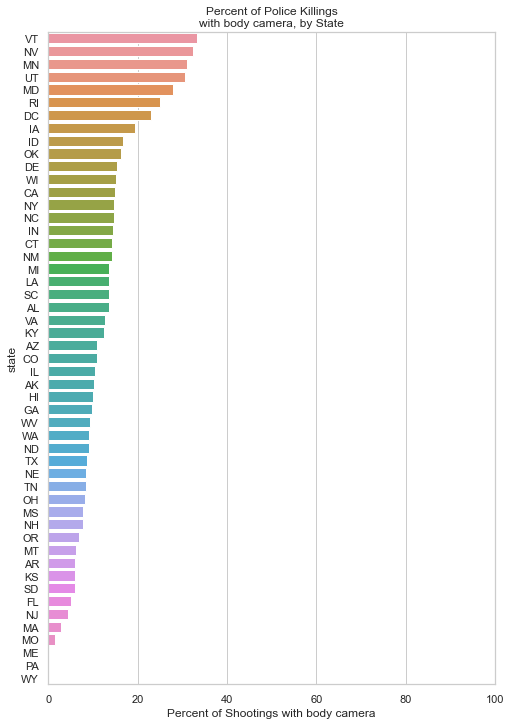

In [86]:
# Count the proportion of shootings w/ body camera by state
pcPK = df.groupby('state').agg({'body_camera': 'mean'})

# Plot percent shootings w/ body camera by state
plt.figure(figsize=(8, 12))
sns.barplot(y=pcPK.index, 
            x=100.*pcPK.values.flatten(),
            order=pcPK.body_camera.sort_values(ascending=False).index)
plt.title('Percent of Police Killings\nwith body camera, by State')
plt.xlabel('Percent of Shootings with body camera')
plt.xlim([0, 100])
plt.show()

The percentages of police shootings where the officer was wearing a body camera varied widely between states. In some states, officers were not wearing body cameras during the shootings. Other states had higher rates of body camera usage. Vermont, Nevada, Minesota, Utah, Maryland are also most city that police shooting with body camera.

#### 3.8 City

Question: Which city that had the most fatal police shooting?

In [87]:
# Import the .CSV file
city_pop = pd.read_csv('CityPop2019.csv',thousands=',', header=0, 
                       names = ['City and State', '2019c'])
city_pop['city'] = ''

# Seperate city & state columns from the combined field to 2 new columns
def split_city(rec):
  return rec.split(',')[0].strip()

def split_state(rec):
  return rec.split(',')[1].strip()

city_pop['city'] = list(map(split_city, city_pop['City and State']))
city_pop['city'] = city_pop['city'].str.replace('.city$','')
city_pop['state_name'] = list(map(split_state, city_pop['City and State']))
city_pop.drop('City and State', axis=1, inplace=True)

city_pop.head()

2019c         city  state_name
0  8336817     New York    New York
1  3979576  Los Angeles  California
2  2693976      Chicago    Illinois
3  2320268      Houston       Texas
4  1680992      Phoenix     Arizona

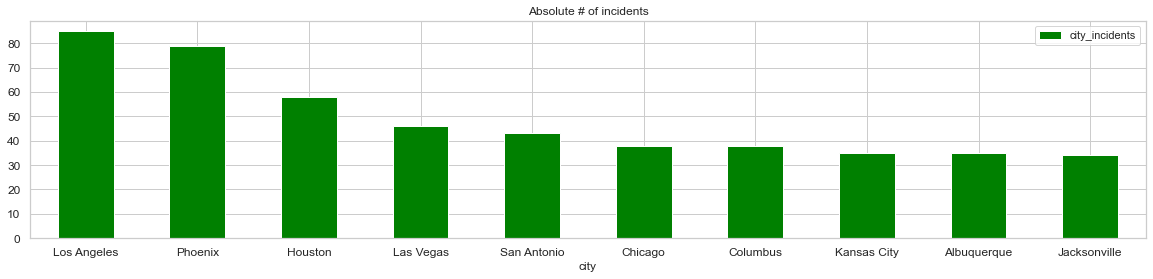

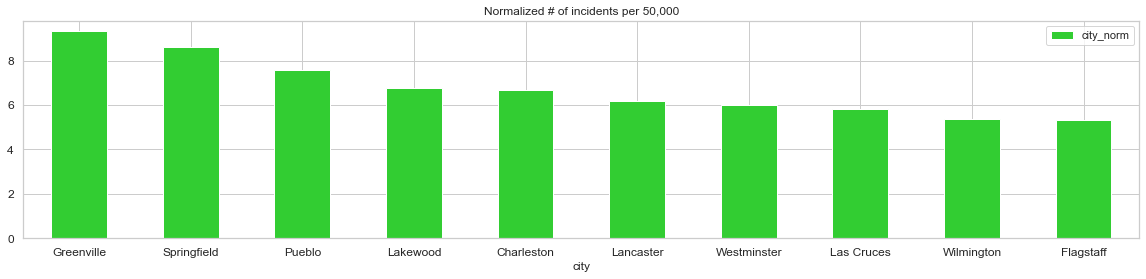

In [88]:
# merge the data of population according to state name
city_data = pd.merge(data_state, city_pop, on=['city','state_name'], how='left')
city_data.head(2)

# calculate the value of normalized incidents per 50,000 population for each row
city_data['city_incidents'] = city_data.groupby('city')['city'].transform('count')
city_data['city_norm'] = city_data['city_incidents'] / city_data['2019c'] * 50000

# Plot the absolute graph of incidents states
total = pd.pivot_table(city_data, values='city_incidents',index='city').sort_values(
    by='city_incidents', ascending=False).head(10)

ax1 = total.plot(kind='bar', figsize = (20, 4),
                 title='Absolute # of incidents',
                 color='green', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, ha='center')

# Plot the normalized graph of incidents states
relative = pd.pivot_table(city_data, values='city_norm', index='city').sort_values(
    by='city_norm', ascending=False).head(10)

ax2 = relative.plot(kind='bar', figsize = (20, 4),
                    title='Normalized # of incidents per 50,000',
                    color = 'limegreen', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, ha='center')
plt.show()

We used city population data 2019 to normalize the data city (per 50,000 population). We assume data population 2019 is not much different with data 2015, 2016, 2017, 2018, 2020. Los Angels, Phoenis, Houston and Las Vegas are the most number of victims (not normalize with data population). We also normalized the data per state per 50,000, using the 2019 population data. Greenville, Springfield and Pueblo is now leading the list with more than 8 incidents per 50,000 population.

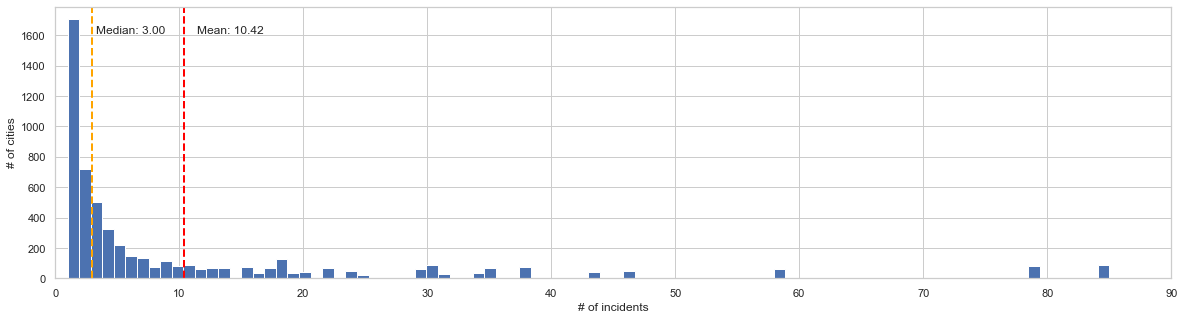

In [89]:
fig, ax1 = plt.subplots(figsize=(20,5))
ax1 = city_data.city_incidents.T.hist(bins=90)
ax1.set_xlabel('# of incidents', fontsize=12)
ax1.set_ylabel('# of cities', fontsize=12)
ax1.set_xlim(0,90)
ax1.set_xticklabels(labels=range(0,91,10))
ax1.axvline(x=city_data.city_incidents.mean(), ymin=0, ymax=1, color='red',
            linewidth=2, linestyle='dashed')
ax1.axvline(x=city_data.city_incidents.median(), ymin=0, ymax=1, color='orange',
            linewidth=2, linestyle='dashed')
min_ylim, max_ylim = plt.ylim()
plt.text(city_data.city_incidents.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(city_data.city_incidents.mean()))
plt.text(city_data.city_incidents.median()*1.1, max_ylim*0.9, 'Median: {:.2f}'.format(city_data.city_incidents.median()))
plt.show()

There are 2820 unique cities in this attribute - an average of less than 2 incidents per city as shown in the histogram below. Looking at the absolute values of the first 20 cities, there are more than 20 cases for each. This means that a lot of cities has only 1 incident per city.

#### 3.9 Summary Exploratory Data Analysis

Insights from EDA process:

- White, Black and Hispanic race people are most affected fatal police shooting, because there race is biggest 3 population in US.
- California,Texas and Florida states have recorded the most number of deaths.
- Loss Angels, Phoenis, Houston and Las Vegas have recorded the most number of victims.
- Most vistims were not fleeing when they were shot by police.
- Normalizing the casualties' race to the population prevalence, there is a significant undeniable bias towards the 'Black' minority.
- There is a continous decline of the percentage of incidents involving victims with signs of mentall illnes.
- Around a quarter of individuals shot and killed by police were experiencing a mental-health crisis
- Most of the individuals shot by police were male.
- Most of the individuals shot and killed by police were between the ages of 20 and 40, with very few older than 90 or younger than 10. 
- The dataset also contains information about type of weapon the individual killed was using. The most common weapon by victims was a gun. (The Small Arms Survey stated that U.S. civilians alone account for 393 million (about 46 percent) of the worldwide total of civilian held firearms. This amounts to "120.5 firearms for every 100 residents.")
- That exist of individuals shot by police were unarmed or armed toy weapon.
- The use of a Teaser-gun is lower than expected, and the use of a gun seems to primarly be the first choice police officer

### 4. CONCLUSION

This anaylsis presents links between different attributrs, personal observations and interpertations according to our understanding.

Futher analysis: 
- This data is only half the story. Police officers are also killed on duty, sometimes in the same event a citizen is killed. We couldn't locate a dataset with police officers deaths, but a further comprehensive EDA is recommended if possible.
- Exploring the data of this dataset at a single state or city level, looking for trends and explain it with domestic changes (e.g. unemployment rate, crime rate, investments in education and so on), may lead to a better understanding of the federal data and may set a course to a better future.
- For analaysis date/time we can include data demonstartion or riot. In that time possibly a large increase in the number of victims

Note:

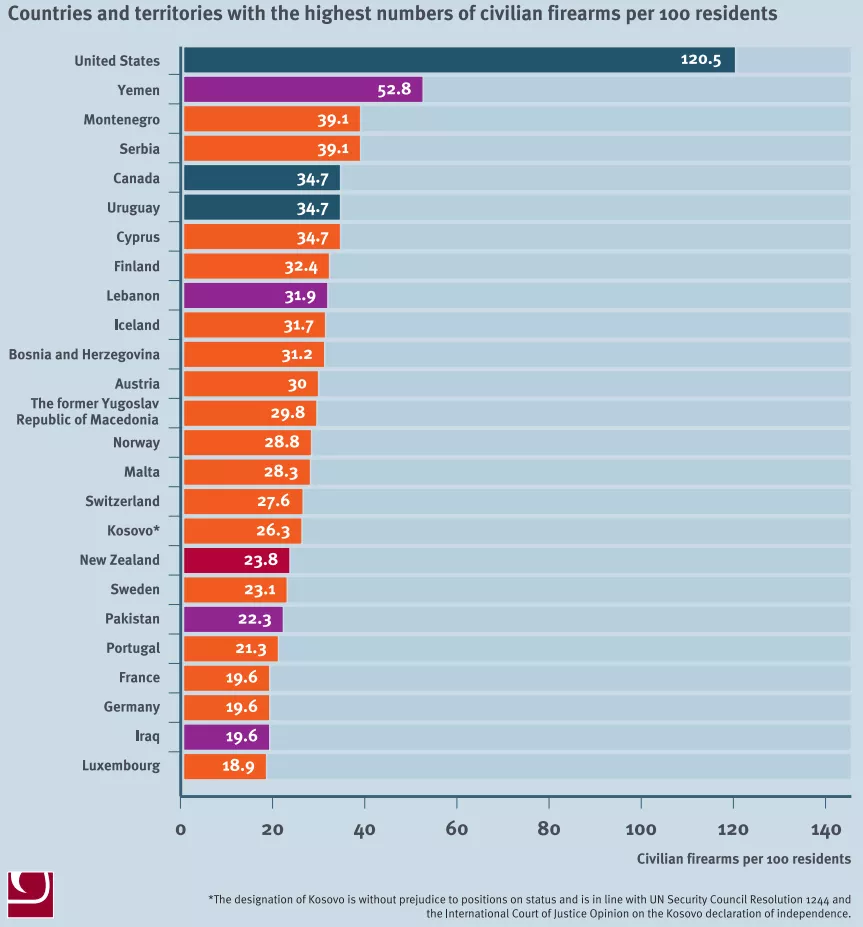

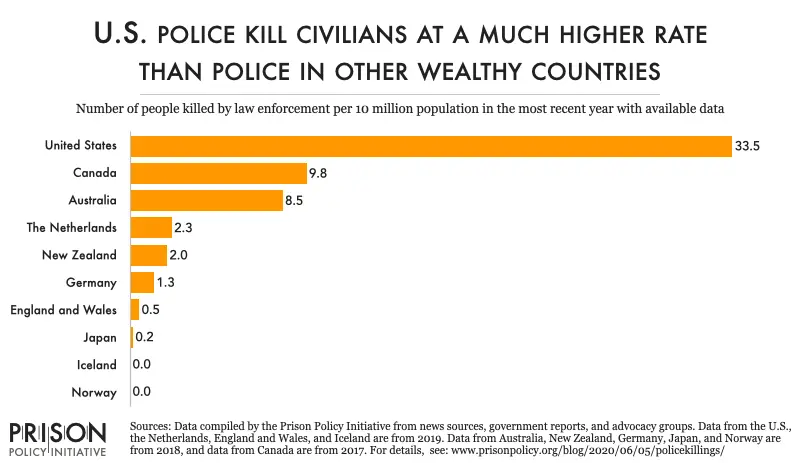